<a href="https://colab.research.google.com/github/frederiksteiner/BEM/blob/main/DataGen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install fenics
!apt-get install -y -qq software-properties-common
!add-apt-repository -y ppa:fenics-packages/fenics
!apt-get update -qq
!apt install -y --no-install-recommends fenics
!sed -i "s|#if PETSC_VERSION_MAJOR == 3 && PETSC_VERSION_MINOR <= 8 && PETSC_VERSION_RELEASE == 1|#if 1|" /usr/include/dolfin/la/PETScLUSolver.h
!rm -rf /usr/lib/python3/dist-packages/mpi4py*
!rm -rf /usr/lib/python3/dist-packages/petsc4py*
!rm -rf /usr/lib/python3/dist-packages/slepc4py*
!rm -rf /usr/lib/petsc/lib/python3/dist-packages/dolfin*
!rm -rf /usr/lib/petsc/lib/python3/dist-packages/mshr*
!wget "https://drive.google.com/uc?export=download&id=1cT_QBJCOW_eL3BThnval3bcpb8o0w-Ad" -O /tmp/mpi4py-2.0.0-cp37-cp37m-linux_x86_64.whl
!wget "https://drive.google.com/uc?export=download&id=119i49bxlGn1mrnhTNmOvM4BqmjrT9Ppr" -O /tmp/petsc4py-3.7.0-cp37-cp37m-linux_x86_64.whl
!wget "https://drive.google.com/uc?export=download&id=1-1tVfu8qz3bRC2zvR8n3RESpesWqNnn6" -O /tmp/slepc4py-3.7.0-cp37-cp37m-linux_x86_64.whl
!wget "https://drive.google.com/uc?export=download&id=1-3qY4VIJQaXVO1HfGQIzTIURIeJbvX-9" -O /tmp/fenics_dolfin-2019.2.0.dev0-cp37-cp37m-linux_x86_64.whl
!wget "https://drive.google.com/uc?export=download&id=1-5SMjgjMuee_9WLeYtGe8N_lvipWEN7W" -O /tmp/mshr-2019.2.0.dev0-cp37-cp37m-linux_x86_64.whl
!pip3 install /tmp/mpi4py-2.0.0-cp37-cp37m-linux_x86_64.whl --upgrade
!pip3 install /tmp/petsc4py-3.7.0-cp37-cp37m-linux_x86_64.whl --upgrade
!pip3 install /tmp/slepc4py-3.7.0-cp37-cp37m-linux_x86_64.whl --upgrade
!pip3 install /tmp/fenics_dolfin-2019.2.0.dev0-cp37-cp37m-linux_x86_64.whl --upgrade
!pip3 install /tmp/mshr-2019.2.0.dev0-cp37-cp37m-linux_x86_64.whl --upgrade
!pip3 -q install --upgrade sympy

import dolfin

In [ ]:
try:
    import google.colab  # noqa: F401
except ImportError:
    import ufl
    import dolfin
else:
    try:
        import ufl
        import dolfin
    except ImportError:
        !wget "https://fem-on-colab.github.io/releases/fenics-install.sh" -O "/tmp/fenics-install.sh" && bash "/tmp/fenics-install.sh"
        import ufl
        import dolfin

--2021-07-22 05:30:27--  https://fem-on-colab.github.io/releases/fenics-install.sh
Resolving fem-on-colab.github.io (fem-on-colab.github.io)... 185.199.108.153, 185.199.109.153, 185.199.110.153, ...
Connecting to fem-on-colab.github.io (fem-on-colab.github.io)|185.199.108.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1946 (1.9K) [application/x-sh]
Saving to: ‘/tmp/fenics-install.sh’

/tmp/fenics-install 100%[===================>]   1.90K  --.-KB/s    in 0s      

2021-07-22 05:30:28 (24.1 MB/s) - ‘/tmp/fenics-install.sh’ saved [1946/1946]

+ PYBIND11_INSTALL_SCRIPT_PATH=https://fem-on-colab.github.io/releases/pybind11-install.sh
+ [[ https://fem-on-colab.github.io/releases/pybind11-install.sh == http* ]]
+ wget https://fem-on-colab.github.io/releases/pybind11-install.sh -O /tmp/pybind11-install.sh
--2021-07-22 05:30:28--  https://fem-on-colab.github.io/releases/pybind11-install.sh
Resolving fem-on-colab.github.io (fem-on-colab.github.io)... 185.199.108.1

In [ ]:
# import fmm
!pip install scikit-fmm

     |████████████████████████████████| 421 kB 7.4 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for scikit-fmm: filename=scikit_fmm-2021.7.8-cp37-cp37m-linux_x86_64.whl size=221784 sha256=ee50d15c4493e68cbfb3adc50f7001db8c3aca1b131f26a221c6dc1f48ce7a2f
  Stored in directory: /root/.cache/pip/wheels/98/ee/50/ad3c0d955a9aa2c8a5d305a96d47f8a689925ec99efbe5e558
Successfully built scikit-fmm


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import sys
sys.path.append('/content/drive/MyDrive/ColabStuff')

Mounted at /content/drive


Random Shape Generator

In [ ]:
def save_shape(shape_list):
    shapes = []
    for shape in shape_list:
        attribs = []
        if hasattr(shape, '_radius'):
            attribs.append('Circle')
            attribs.append(shape._radius)
            attribs.append(shape._center) 
            attribs.append(shape._coeff)
            attribs.append(shape._eps)
        else:
            attribs.append('Ellipse')
            attribs.append(shape._W)
            attribs.append(shape._center) 
            attribs.append(shape._coeff)
            attribs.append(shape.eps)
        shapes.append(attribs)
    return shapes

def load_shape(shapes):
    shape_list = []
    for attribs in shapes:
        if attribs[0] == 'Circle':
            circle = circle_source(attribs[1], attribs[2], attribs[3])
            circle._eps = attribs[4]
            shape_list.append(circle)
        else: 
            ellipse = generate_ellipse
            ellipse._W = attribs[1]
            ellipse._center = attribs[2]
            ellipse._coeff = attribs[3]
            ellipse._eps = attribs[4]
            shape_list.append(ellipse)
    return shape_list

In [ ]:


def gen_shape(maxShapeNum):
    shapes = list()
    types = 2
    num_of_shapes = np.random.randint(low = 1, high = maxShapeNum)
    for i in range(num_of_shapes):
        type_of_shape = np.random.randint(types)
        if (type_of_shape == 0):
            shapes.append(generate_circle())
        elif (type_of_shape == 1):
            shapes.append(generate_ellipse())
        else:
            shapes.append(generate_square())
    return shapes
def generate_circle():
    radius = np.random.rand()
    center = random_unit_circle()
    coeff = 2*np.random.rand() - 1
    return circle_source(radius, center, coeff)
def generate_ellipse():
    length = np.sqrt(np.random.uniform(0, 1))
    angle = np.pi * np.random.uniform(0, 2) 
    x = length * np.cos(angle)
    y = length * np.sin(angle)
    center = [x ,y]
    r_x = np.random.rand()
    r_y = np.random.rand()
    e_major = random_unit_circle()
    e_major /= np.linalg.norm(e_major)
    e_minor = np.ones((2,))  
    e_minor -= e_minor.dot(e_major) * e_major       
    e_minor /= np.linalg.norm(e_minor)
    e_major = np.expand_dims(e_major, axis = 1)
    e_minor = np.expand_dims(e_minor, axis = 1)
    coeff = 2*np.random.rand() - 1
    return ellipse_source(r_x, r_y, center, e_major, e_minor, coeff) 

def random_unit_circle():
    length = np.sqrt(np.random.uniform(0, 1))
    angle = np.pi * np.random.uniform(0, 2) 
    x = length * np.cos(angle)
    y = length * np.sin(angle)
    return np.array([x,y])


In [ ]:
import numpy as np
from fenics import *
from mshr import *
import scipy.interpolate
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.io import savemat

In [ ]:
from scipy.interpolate import LinearNDInterpolator
def interpolate_neumann(ub_coords, u, h):
    f = interp = LinearNDInterpolator(u[:,:2], u[:,2])
    #f =  scipy.interpolate.interp2d(u[:,0], u[:,1], u[:,2])
    dn_data = 1/h*(f(ub_coords[:,0], ub_coords[:,1]) - f(ub_coords[:,0]-h*ub_coords[:,0],ub_coords[:,1]-h*ub_coords[:,1]))


    #uunitx = f(ub_coords[:,0]-h, ub_coords[:,1])
    #uunity = f(ub_coords[:,0], ub_coords[:,1] - h)
    #uunitxp = f(ub_coords[:,0]+h, ub_coords[:,1])
    #uunityp = f(ub_coords[:,0], ub_coords[:,1] + h)
    #print(np.multiply((uunitxp - uunitx),ub_coords[:,0]))
    #dn_data = 1/(2*h)* (np.multiply((uunitxp - uunitx),ub_coords[:,0]) + np.multiply((uunityp - uunity), ub_coords[:,1]))
    return dn_data


In [ ]:
def get_coord_values(coords, expr):
    n = coords.shape[0]
    vals = np.zeros((n,1))
    for i in range(n):
        vals[i] = expr(coords[i,:])
    return vals

In [ ]:

class circle_source(UserExpression):
    def __init__(self, radius, center, coeff, **kwargs):
        super().__init__(**kwargs)
        self._radius = radius
        self._center = center
        self._coeff = coeff
    def eval(self, value, x):
        #idxs = ((x[0,:] - self.center[0])**2 + (x[1,:] - self.center[1])**2 < self.radius**2)
        if (x[0] - self._center[0])**2 + (x[1] - self._center[1])**2 < self._radius**2:
            value[0] = self._coeff
        else:
            value[0] = 0.0
    def value_shape(self):
        return ()
class ellipse_source(UserExpression):
    def __init__(self, rx, ry, center, e_major, e_minor, coeff, **kwargs):
        super().__init__(**kwargs)
        rads = np.sqrt(np.diag([1/rx, 1/ry])) 
        self._coeff = coeff
        self._center = center
        E = np.concatenate((e_major,e_minor), axis = 1)
        self._W = rads @ E
    def eval(self, value, x):
        x_cent = np.expand_dims(-np.array([(self._center[0] - x[0]), (self._center[1] - x[1])]), axis = 1)
        if np.linalg.norm(self._W @ x_cent) < 1:
            value[0] = self._coeff
        else:
            value[0] = 0.0
    def value_shape(self):
        return ()

In [ ]:
class gaussian_boundary2(UserExpression):
    def __init__(self, field, xx, yy, **kwargs):
        super().__init__(**kwargs)
        self._f = scipy.interpolate.RectBivariateSpline(xx, yy, field)
        self._f = scipy.interpolate.RectBivariateSpline(xx, yy, field - mean)
    def eval(self, value, x):
        value[0] = self._f(x[0], x[1])[0][0]
    def value_shape(self):
        return ()

In [ ]:
import os
os.mkdir('Data')

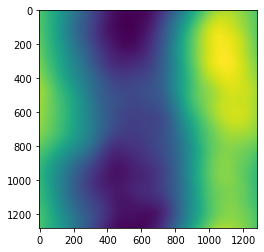

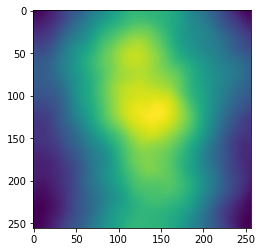

In [ ]:
import numpy
import scipy.fftpack


def fftind(size):
    """ Returns a numpy array of shifted Fourier coordinates k_x k_y.
        
        Input args:
            size (integer): The size of the coordinate array to create
        Returns:
            k_ind, numpy array of shape (2, size, size) with:
                k_ind[0,:,:]:  k_x components
                k_ind[1,:,:]:  k_y components
                
        Example:
        
            print(fftind(5))
            
            [[[ 0  1 -3 -2 -1]
            [ 0  1 -3 -2 -1]
            [ 0  1 -3 -2 -1]
            [ 0  1 -3 -2 -1]
            [ 0  1 -3 -2 -1]]
            [[ 0  0  0  0  0]
            [ 1  1  1  1  1]
            [-3 -3 -3 -3 -3]
            [-2 -2 -2 -2 -2]
            [-1 -1 -1 -1 -1]]]
            
        """
    k_ind = numpy.mgrid[:size, :size] - int( (size + 1)/2 )
    k_ind = scipy.fftpack.fftshift(k_ind)
    return( k_ind )



def gaussian_random_field(alpha = 3.0,
                          size = 128, 
                          flag_normalize = True):
    """ Returns a numpy array of shifted Fourier coordinates k_x k_y.
        
        Input args:
            alpha (double, default = 3.0): 
                The power of the power-law momentum distribution
            size (integer, default = 128):
                The size of the square output Gaussian Random Fields
            flag_normalize (boolean, default = True):
                Normalizes the Gaussian Field:
                    - to have an average of 0.0
                    - to have a standard deviation of 1.0
        Returns:
            gfield (numpy array of shape (size, size)):
                The random gaussian random field
                
        Example:
        import matplotlib
        import matplotlib.pyplot as plt
        example = gaussian_random_field()
        plt.imshow(example)
        """
        
        # Defines momentum indices
    k_idx = fftind(size)

        # Defines the amplitude as a power law 1/|k|^(alpha/2)
    amplitude = numpy.power( k_idx[0]**2 + k_idx[1]**2 + 1e-10, -alpha/4.0 )
    amplitude[0,0] = 0
    
        # Draws a complex gaussian random noise with normal
        # (circular) distribution
    noise = numpy.random.normal(size = (size, size)) \
        + 1j * numpy.random.normal(size = (size, size))
    
        # To real space
    gfield = numpy.fft.ifft2(noise * amplitude).real
    
        # Sets the standard deviation to one
    if flag_normalize:
        gfield = gfield - numpy.mean(gfield)
        gfield = gfield/numpy.std(gfield)
        
    return gfield




def main():
    import matplotlib
    import matplotlib.pyplot as plt
    factor = 5
    alpha = 6.0
    example = gaussian_random_field(alpha,factor*256)
    example2 = gaussian_random_field(alpha, 256)
    plt.imshow(example)
    plt.show()
    plt.imshow(example2)
    plt.show()
    

    
if __name__ == '__main__':
    main()




# DataGen for Training

/usr/lib/python3/dist-packages/ufl/exproperators.py:325: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if arg in ("+", "-"):


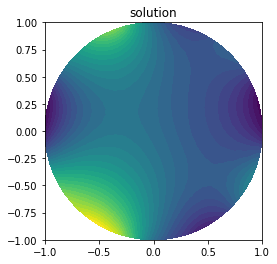

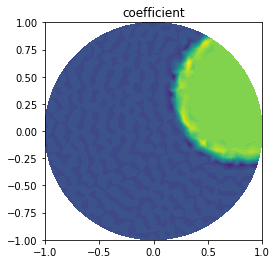

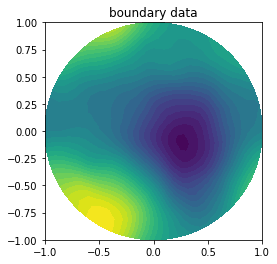

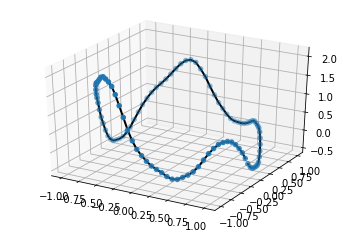

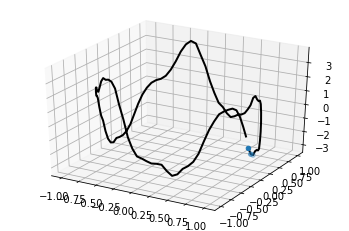

In [ ]:
# Create mesh and define function space
coeff_coord_bool = False
coeff_coord_given = np.load('/content/drive/MyDrive/ColabStuff/NewDataNonCont/2ndGen/CoarserData/CoeffFinderData/coords.npy')
savepath = '/content/drive/MyDrive/ColabStuff/NewDataNonCont/2ndGen/CoarserData/Mean0/2'
#savepath = '/content/Data/'

num_of_samples = 1
savenum = min([num_of_samples, 500])
count = 1
domain = Circle(Point(0.,0.),1.0,300)   ################used for coarser data gen
mesh = generate_mesh(domain, 30, "cgal")
master_mesh = mesh

domain = Circle(Point(0.,0.),1.0,100)   ################used for coarser data gen
mesh = generate_mesh(domain, 20, "cgal")

#domain = Circle(Point(0.,0.),1.0,50)
#mesh = generate_mesh(domain, 10, "cgal")

V = FunctionSpace(mesh, 'CG', 1)

# Define boundary and coeff condition
coef_list = []
d_data = []
n_data = []
for i in range(num_of_samples):
    gridsize = 256*2
    alpha = 6.0
    field = gaussian_random_field(alpha, gridsize)
    xx = np.linspace(-1.0, 1.0, num=gridsize)
    yy = np.linspace(-1.0, 1.0, num=gridsize)

    u_D = gaussian_boundary2(field, xx, yy)
    

    groundvalue = 1.0

    shape_list = gen_shape(4)
    coef = circle_source(1.1, [0,0], groundvalue)
    for shape in shape_list:
        coef = coef + shape
    


    def boundary(x, on_boundary):
        return on_boundary


    bc = DirichletBC(V, u_D, boundary)


    # Define variational problem
    u = TrialFunction(V)
    v = TestFunction(V)
    f = Constant(0.0)
    a = dot(coef*grad(u), grad(v))*dx
    L = f*v*ds

    # Compute solution
    u = Function(V)
    solve(a == L, u, bc)

    v2d = vertex_to_dof_map(V)
    if coeff_coord_bool:
        coeff_coord = coeff_coord_given
    else:
        coeff_coord = mesh.coordinates()
    #nodal_values = np.array(coef_FEM.vector())
    #nodal_values = nodal_values[v2d]
    #nodal_values = np.expand_dims(nodal_values, axis = 1)
    nodal_values = get_coord_values(coeff_coord, coef)
    test = np.concatenate((coeff_coord, nodal_values), axis = 1)
    #test = np.concatenate((coeff_coord, nodal_values), axis = 1)
    coef_list.append(test)

    nodal_values = np.array(u.vector())
    nodal_values = nodal_values[v2d]
    nodal_values = np.expand_dims(nodal_values, axis = 1)
    test = np.concatenate((mesh.coordinates(), nodal_values), axis = 1)

    bmesh = BoundaryMesh(mesh, "exterior", True)
    Vb = FunctionSpace(bmesh, "Lagrange", 1)
    ub = interpolate(u,Vb)
    ub_coord = bmesh.coordinates()
    v2d_b = vertex_to_dof_map(Vb)
    nodal_values_b = np.array(ub.vector())
    nodal_values_b = nodal_values_b[v2d_b]
    nodal_values_b = np.expand_dims(nodal_values_b, axis = 1)
    test_b = np.concatenate((ub_coord, nodal_values_b), axis = 1)
    test_b[0:3,:] = test_b[[2,0,1],:]
    d_data.append(test_b)

    test_n = interpolate_neumann(ub_coord,test, mesh.hmax())
    test_n[0:3] = test_n[[2,0,1]]
    n_data.append(test_n)
    dntest = n_data[-1]
    if ((i+1)%savenum == 0):
        aname = 'adata{:02d}.mat'.format(count) 
        uname = 'uboundary_data{:02d}.mat'.format(count)
        dnname = 'dn_data{:02d}.mat'.format(count)
        savemat(savepath + aname,
                {"a_data":coef_list})
        savemat(savepath + uname,
                {"u_data":d_data})
        savemat(savepath + dnname,
                {"dn_data":n_data})
        coef_list = []
        d_data = []
        n_data = []
        count = count + 1
    if ((i+1) %100 == 0):
        print('{:04d} samples calculated'.format(i+1))

    

coef_FEM = project(coef, V)
u_D1 = project(u_D, V)

# Plot solution and mesh
fig = plt.figure()
plot(u, title = 'solution')
plt.show()
fig = plt.figure()
plot(coef_FEM, title = 'coefficient')
plt.show()
fig = plt.figure()
plot(u_D1, title = 'boundary data')
plt.show()

#fig = plt.figure()
#ax = plt.axes(projection='3d')
#ax.view_init(azim=-90, elev=90)
#ax.plot_trisurf(coef_list[-1][:,0], coef_list[-1][:,1], coef_list[-1][:,2], cmap='viridis', linewidth=0.2, antialiased=True, edgecolor='grey')
#plt.show()

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot(test_b[:,0], test_b[:,1], test_b[:,2], label='Ground truth', color='black', linewidth = 2 )
ax.scatter(test_b[:,0], test_b[:,1], test_b[:,2])
plt.show()

test_b[:,2] = dntest
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot(test_b[:,0], test_b[:,1], test_b[:,2], label='Ground truth', color='black', linewidth = 2 )
ax.scatter(test_b[0:3,0], test_b[0:3,1], test_b[0:3,2])
plt.show()



In [ ]:
print(test_b[0:5,:])
print(bmesh.coordinates())
print()


(1568, 2)


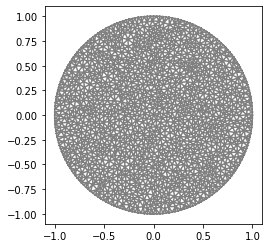

In [ ]:
domain = Circle(Point(0.,0.),1.0,200)   #50, 10 for Coarser
mesh = generate_mesh(domain, 30, "cgal")
domain = Circle(Point(0.,0.),1.0,200)   ################used for coarser data gen
mesh = generate_mesh(domain, 27, "cgal")
master_mesh = mesh

print(mesh.coordinates().shape)
plot(mesh)


In [ ]:
np.save('/content/Data/coords', mesh.coordinates())
np.save('/content/Data/cells', mesh.cells())

In [ ]:
count = 1
aname = 'adata{:02d}.mat'.format(count)                                                             
uname = 'uboundary_data{:02d}.mat'.format(count)
dnname = 'dn_data{:02d}.mat'.format(count)
savemat('/content/drive/MyDrive/ColabStuff/NewDataNonCont/2ndGen/CoarserData/' + aname,
        {"a_data":coef_list})
savemat('/content/drive/MyDrive/ColabStuff/NewDataNonCont/2ndGen/CoarserData/' + uname,
        {"u_data":d_data})
savemat('/content/drive/MyDrive/ColabStuff/NewDataNonCont/2ndGen/CoarserData/' + dnname,
        {"dn_data":n_data})

# DataGen for Test on different boundary grids

/usr/lib/python3/dist-packages/ufl/exproperators.py:325: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if arg in ("+", "-"):
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


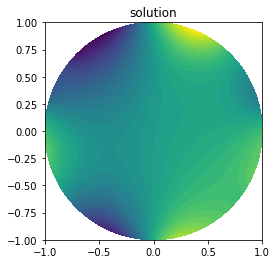

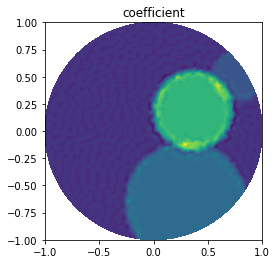

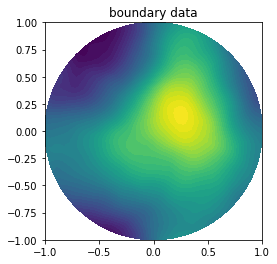

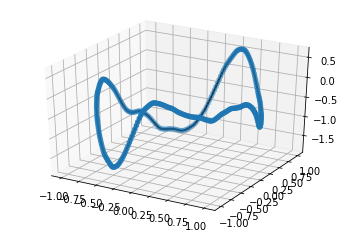

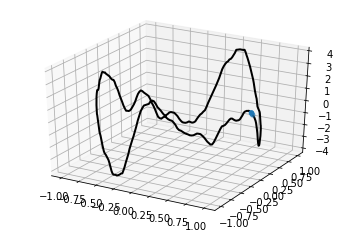

In [ ]:
#coeff_coord_bool = False
#coeff_coord_given = np.load('/content/drive/MyDrive/ColabStuff/NewDataNonCont/2ndGen/CoarserData/CoeffFinderData/coords.npy')
savepath = '/content/drive/MyDrive/ColabStuff/NewDataNonCont/2ndGen/CoarserData/'
#savepath = '/content/Data/'

num_of_samples = 6
savenum = min([num_of_samples, 500])
count = 1

mesh_list = []
domain = Circle(Point(0.,0.),1.0,25)   #50, 10 for Coarser
mesh = generate_mesh(domain, 5, "cgal")
mesh_list.append(mesh)

domain = Circle(Point(0.,0.),1.0,50)
mesh = generate_mesh(domain, 10, "cgal")
mesh_list.append(mesh)

domain = Circle(Point(0.,0.),1.0,100)   ################used for coarser data gen
mesh = generate_mesh(domain, 20, "cgal")
mesh_list.append(mesh)

domain = Circle(Point(0.,0.),1.0,200)   ################used for coarser data gen
mesh = generate_mesh(domain, 20, "cgal")
mesh_list.append(mesh)

domain = Circle(Point(0.,0.),1.0,300)   ################used for coarser data gen
mesh = generate_mesh(domain, 30, "cgal")
mesh_list.append(mesh)

#domain = Circle(Point(0.,0.),1.0,400)   ################used for coarser data gen
#mesh = generate_mesh(domain, 50, "cgal")
#mesh_list.append(mesh)

#mesh = refine(mesh)
master_mesh = mesh




# Define boundary and coeff condition




for i in range(num_of_samples):
    coef_list = []
    d_data = []
    n_data = []
    gridsize =2*256
    alpha = 6.0
    field = gaussian_random_field(alpha, gridsize)
    xx = np.linspace(-1.0, 1.0, num=gridsize)
    yy = np.linspace(-1.0, 1.0, num=gridsize)

    u_D = gaussian_boundary2(field, xx, yy)
    

    groundvalue = 1.0

    shape_list = gen_shape(4)
    coef = circle_source(1.1, [0,0], groundvalue)
    for shape in shape_list:
        coef = coef + shape
    
    def boundary(x, on_boundary):
        return on_boundary

    V = FunctionSpace(master_mesh, 'CG', 1)
    v2d = vertex_to_dof_map(V)

    bc = DirichletBC(V, u_D, boundary)


    # Define variational problem
    u = TrialFunction(V)
    v = TestFunction(V)
    f = Constant(0.0)
    a = dot(coef*grad(u), grad(v))*dx
    L = f*v*ds

    # Compute solution
    u = Function(V)
    solve(a == L, u, bc)

    nodal_values = np.array(u.vector())
    nodal_values = nodal_values[v2d]
    nodal_values = np.expand_dims(nodal_values, axis = 1)
    test = np.concatenate((master_mesh.coordinates(), nodal_values), axis = 1)
    u_values = test

    ub_interpolant = LinearNDInterpolator(u_values[:,:2], u_values[:,2])
    


    for mesh in mesh_list:
        V = FunctionSpace(mesh, 'CG', 1)

        bc = DirichletBC(V, u_D, boundary)

        v2d = vertex_to_dof_map(V)
        coeff_coord = mesh.coordinates()
        nodal_values = get_coord_values(coeff_coord, coef)
        test = np.concatenate((coeff_coord, nodal_values), axis = 1)
        #test = np.concatenate((coeff_coord, nodal_values), axis = 1)
        coef_list.append(test)

        bmesh = BoundaryMesh(mesh, "exterior", True)
        Vb = FunctionSpace(bmesh, "Lagrange", 1)
        ub_coord = bmesh.coordinates()

        nodal_values_b = ub_interpolant(ub_coord[:,0], ub_coord[:,1])
        nodal_values_b = np.expand_dims(nodal_values_b, axis = 1)
        test_b = np.concatenate((ub_coord, nodal_values_b), axis = 1)
        test_b[0:3,:] = test_b[[2,0,1],:]
        d_data.append(test_b)

        test_n = interpolate_neumann(ub_coord,u_values, master_mesh.hmax())
        test_n[0:3] = test_n[[2,0,1]]
        n_data.append(test_n)
        dntest = n_data[-1]

    aname = 'adata{:02d}.mat'.format(i+1) 
    uname = 'uboundary_data{:02d}.mat'.format(i+1)
    dnname = 'dn_data{:02d}.mat'.format(i+1)
    savemat(savepath + aname,
            {"a_data":coef_list})
    savemat(savepath + uname,
            {"u_data":d_data})
    savemat(savepath + dnname,
            {"dn_data":n_data})
        

coef_FEM = project(coef, V)
u_D1 = project(u_D, V)

# Plot solution and mesh
fig = plt.figure()
plot(u, title = 'solution')
plt.show()
fig = plt.figure()
plot(coef_FEM, title = 'coefficient')
plt.show()
fig = plt.figure()
plot(u_D1, title = 'boundary data')
plt.show()

#fig = plt.figure()
#ax = plt.axes(projection='3d')
#ax.view_init(azim=-90, elev=90)
#ax.plot_trisurf(coef_list[-1][:,0], coef_list[-1][:,1], coef_list[-1][:,2], cmap='viridis', linewidth=0.2, antialiased=True, edgecolor='grey')
#plt.show()

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot(test_b[:,0], test_b[:,1], test_b[:,2], label='Ground truth', color='black', linewidth = 2 )
ax.scatter(test_b[:,0], test_b[:,1], test_b[:,2])
plt.show()

test_b[:,2] = dntest
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot(test_b[:,0], test_b[:,1], test_b[:,2], label='Ground truth', color='black', linewidth = 2 )
ax.scatter(test_b[0:3,0], test_b[0:3,1], test_b[0:3,2])
plt.show()



# DataGen for Test on different domain grids

/usr/lib/python3/dist-packages/ufl/exproperators.py:325: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if arg in ("+", "-"):
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


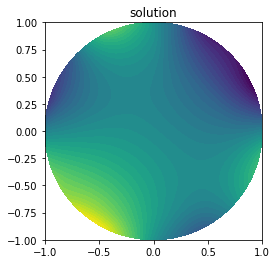

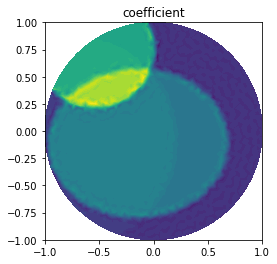

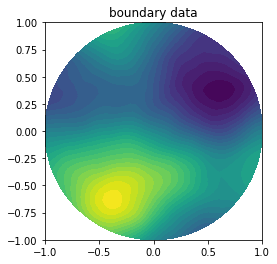

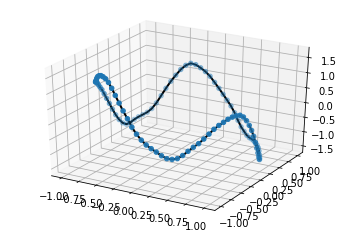

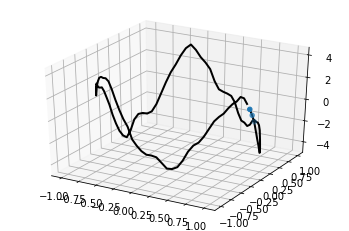

In [ ]:
#coeff_coord_bool = False
#coeff_coord_given = np.load('/content/drive/MyDrive/ColabStuff/NewDataNonCont/2ndGen/CoarserData/CoeffFinderData/coords.npy')
savepath = '/content/drive/MyDrive/ColabStuff/NewDataNonCont/2ndGen/CoarserData/FixedBoundaryData/'
#savepath = '/content/Data/'

num_of_samples = 6
savenum = min([num_of_samples, 500])
count = 1

mesh_list = []
domain = Circle(Point(0.,0.),1.0,25)   #50, 10 for Coarser
mesh = generate_mesh(domain, 5, "cgal")
mesh_list.append(mesh)

domain = Circle(Point(0.,0.),1.0,50)
mesh = generate_mesh(domain, 10, "cgal")
mesh_list.append(mesh)

domain = Circle(Point(0.,0.),1.0,100)   ################used for coarser data gen
mesh = generate_mesh(domain, 20, "cgal")
mesh_list.append(mesh)
bmesh = BoundaryMesh(mesh, "exterior", True)
Vb = FunctionSpace(bmesh, "Lagrange", 1)
fixed_coord = bmesh.coordinates()

domain = Circle(Point(0.,0.),1.0,200)   ################used for coarser data gen
mesh = generate_mesh(domain, 20, "cgal")
mesh_list.append(mesh)

domain = Circle(Point(0.,0.),1.0,200)   ################used for coarser data gen
mesh = generate_mesh(domain, 27, "cgal")
mesh_list.append(mesh)

domain = Circle(Point(0.,0.),1.0,300)   ################used for coarser data gen
mesh = generate_mesh(domain, 30, "cgal")
mesh_list.append(mesh)

#domain = Circle(Point(0.,0.),1.0,400)   ################used for coarser data gen
#mesh = generate_mesh(domain, 50, "cgal")
#mesh_list.append(mesh)

#mesh = refine(mesh)
master_mesh = mesh




# Define boundary and coeff condition




for i in range(num_of_samples):
    coef_list = []
    d_data = []
    n_data = []
    gridsize =2*256
    alpha = 6.0
    field = gaussian_random_field(alpha, gridsize)
    xx = np.linspace(-1.0, 1.0, num=gridsize)
    yy = np.linspace(-1.0, 1.0, num=gridsize)

    u_D = gaussian_boundary2(field, xx, yy)
    

    groundvalue = 1.0

    shape_list = gen_shape(4)
    coef = circle_source(1.1, [0,0], groundvalue)
    for shape in shape_list:
        coef = coef + shape
    
    def boundary(x, on_boundary):
        return on_boundary

    V = FunctionSpace(master_mesh, 'CG', 1)
    v2d = vertex_to_dof_map(V)

    bc = DirichletBC(V, u_D, boundary)


    # Define variational problem
    u = TrialFunction(V)
    v = TestFunction(V)
    f = Constant(0.0)
    a = dot(coef*grad(u), grad(v))*dx
    L = f*v*ds

    # Compute solution
    u = Function(V)
    solve(a == L, u, bc)

    nodal_values = np.array(u.vector())
    nodal_values = nodal_values[v2d]
    nodal_values = np.expand_dims(nodal_values, axis = 1)
    test = np.concatenate((master_mesh.coordinates(), nodal_values), axis = 1)
    u_values = test

    ub_interpolant = LinearNDInterpolator(u_values[:,:2], u_values[:,2])
    


    for mesh in mesh_list:
        V = FunctionSpace(mesh, 'CG', 1)

        bc = DirichletBC(V, u_D, boundary)

        v2d = vertex_to_dof_map(V)
        coeff_coord = mesh.coordinates()
        nodal_values = get_coord_values(coeff_coord, coef)
        test = np.concatenate((coeff_coord, nodal_values), axis = 1)
        coef_list.append(test)

        bmesh = BoundaryMesh(mesh, "exterior", True)
        Vb = FunctionSpace(bmesh, "Lagrange", 1)
        ub_coord = bmesh.coordinates()

        nodal_values_b = ub_interpolant(fixed_coord[:,0], fixed_coord[:,1])
        nodal_values_b = np.expand_dims(nodal_values_b, axis = 1)
        test_b = np.concatenate((fixed_coord, nodal_values_b), axis = 1)
        test_b[0:3,:] = test_b[[2,0,1],:]
        d_data.append(test_b)

        test_n = interpolate_neumann(fixed_coord,u_values, master_mesh.hmax())
        test_n[0:3] = test_n[[2,0,1]]
        n_data.append(test_n)
        dntest = n_data[-1]

    aname = 'adata{:02d}.mat'.format(i+1) 
    uname = 'uboundary_data{:02d}.mat'.format(i+1)
    dnname = 'dn_data{:02d}.mat'.format(i+1)
    savemat(savepath + aname,
            {"a_data":coef_list})
    savemat(savepath + uname,
            {"u_data":d_data})
    savemat(savepath + dnname,
            {"dn_data":n_data})
        

coef_FEM = project(coef, V)
u_D1 = project(u_D, V)

# Plot solution and mesh
fig = plt.figure()
plot(u, title = 'solution')
plt.show()
fig = plt.figure()
plot(coef_FEM, title = 'coefficient')
plt.show()
fig = plt.figure()
plot(u_D1, title = 'boundary data')
plt.show()

#fig = plt.figure()
#ax = plt.axes(projection='3d')
#ax.view_init(azim=-90, elev=90)
#ax.plot_trisurf(coef_list[-1][:,0], coef_list[-1][:,1], coef_list[-1][:,2], cmap='viridis', linewidth=0.2, antialiased=True, edgecolor='grey')
#plt.show()

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot(test_b[:,0], test_b[:,1], test_b[:,2], label='Ground truth', color='black', linewidth = 2 )
ax.scatter(test_b[:,0], test_b[:,1], test_b[:,2])
plt.show()

test_b[:,2] = dntest
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot(test_b[:,0], test_b[:,1], test_b[:,2], label='Ground truth', color='black', linewidth = 2 )
ax.scatter(test_b[0:3,0], test_b[0:3,1], test_b[0:3,2])
plt.show()


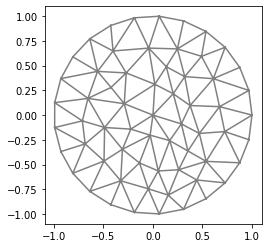

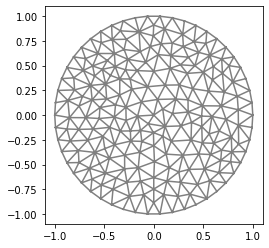

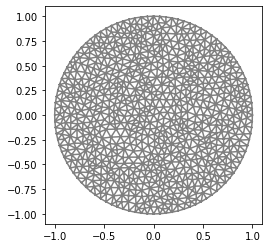

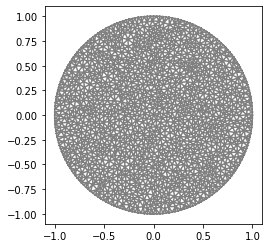

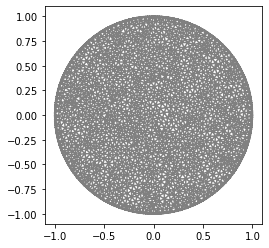

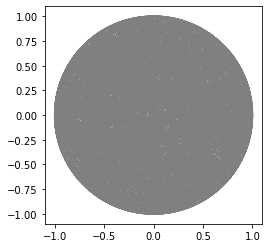

In [ ]:
mesh_list = []
domain = Circle(Point(0.,0.),1.0,25)   #50, 10 for Coarser
mesh = generate_mesh(domain, 5, "cgal")
mesh_list.append(mesh)

domain = Circle(Point(0.,0.),1.0,50)
mesh = generate_mesh(domain, 10, "cgal")
mesh_list.append(mesh)

domain = Circle(Point(0.,0.),1.0,100)   ################used for coarser data gen
mesh = generate_mesh(domain, 20, "cgal")
mesh_list.append(mesh)

domain = Circle(Point(0.,0.),1.0,200)   ################used for coarser data gen
mesh = generate_mesh(domain, 27, "cgal")
mesh_list.append(mesh)

domain = Circle(Point(0.,0.),1.0,300)   ################used for coarser data gen
mesh = generate_mesh(domain, 30, "cgal")
mesh_list.append(mesh)

domain = Circle(Point(0.,0.),1.0,400)   ################used for coarser data gen
mesh = generate_mesh(domain, 50, "cgal")
mesh_list.append(mesh)


count = 1
for mesh in mesh_list:
    fig = plt.figure()
    plot(mesh)

        

# DataGen for Coeffinder Net


In [ ]:
class circle_source_ground(UserExpression):
    def __init__(self, radius, center, coeff, **kwargs):
        super().__init__(**kwargs)
        self._radius = radius
        self._center = center
        self._coeff = coeff
    def eval(self, value, x):
        #idxs = ((x[0,:] - self.center[0])**2 + (x[1,:] - self.center[1])**2 < self.radius**2)
        if (x[0] - self._center[0])**2 + (x[1] - self._center[1])**2 < self._radius**2:
            value[0] = self._coeff
        else:
            value[0] = 0.0
    def value_shape(self):
        return ()

In [ ]:
class circle_source(UserExpression):
    def __init__(self, radius, center, coeff, **kwargs):
        super().__init__(**kwargs)
        self._radius = radius
        self._center = center
        self._coeff = coeff
        self._eps = np.random.uniform(low = 0.85, high = 0.99)
    def eval(self, value, x):
        #idxs = ((x[0,:] - self.center[0])**2 + (x[1,:] - self.center[1])**2 < self.radius**2)
        if (x[0] - self._center[0])**2 + (x[1] - self._center[1])**2 < self._radius**2 and (x[0]**2 + x[1]**2) < self._eps**2:
            value[0] = self._coeff
        else:
            value[0] = 0.0
    def value_shape(self):
        return ()
class ellipse_source(UserExpression):
    def __init__(self, rx, ry, center, e_major, e_minor, coeff, **kwargs):
        super().__init__(**kwargs)
        rads = np.sqrt(np.diag([1/rx, 1/ry])) 
        self._coeff = coeff
        self._center = center
        E = np.concatenate((e_major,e_minor), axis = 1)
        self._W = rads @ E
        self._eps = np.random.uniform(low = 0.85, high = 0.99)
    def eval(self, value, x):
        x_cent = np.expand_dims(-np.array([(self._center[0] - x[0]), (self._center[1] - x[1])]), axis = 1)
        if np.linalg.norm(self._W @ x_cent) < 1 and (x[0]**2 + x[1]**2) < self._eps**2:
            value[0] = self._coeff
        else:
            value[0] = 0.0
    def value_shape(self):
        return ()

In [ ]:
class gaussian_boundary2(UserExpression):
    def __init__(self, field, xx, yy, **kwargs):
        super().__init__(**kwargs)
        self._f = scipy.interpolate.RectBivariateSpline(xx, yy, field)
    def eval(self, value, x):
        value[0] = self._f(x[0], x[1])[0][0]
    def value_shape(self):
        return ()

/usr/lib/python3/dist-packages/ufl/exproperators.py:325: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if arg in ("+", "-"):


Calling FFC just-in-time (JIT) compiler, this may take some time.


/usr/lib/python3/dist-packages/ufl/exproperators.py:325: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if arg in ("+", "-"):


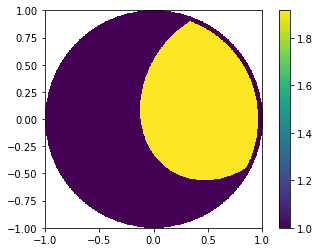

In [ ]:

savepath = '/content/drive/MyDrive/ColabStuff/NewDataNonCont/2ndGen/CoarserData/CoeffFinderData/'

num_of_samples = 450
savenum = np.min([num_of_samples, 500])
count = 5

mesh_list = []
#domain = Circle(Point(0.,0.),1.0,25)   #50, 10 for Coarser
#mesh = generate_mesh(domain, 5, "cgal")
#mesh_list.append(mesh)

#domain = Circle(Point(0.,0.),1.0,50)
#mesh_eval = generate_mesh(domain, 10, "cgal")

#mesh_list.append(mesh)
mesh_list = []

domain = Circle(Point(0.,0.),1.0,200)   
mesh = generate_mesh(domain, 27, "cgal")
mesh_eval = mesh

# domain = Circle(Point(0.,0.),1.0,100)   ################used for coarser data gen
# mesh = generate_mesh(domain, 20, "cgal")
mesh_list.append(mesh)
bmesh = BoundaryMesh(mesh, "exterior", True)
Vb = FunctionSpace(bmesh, "Lagrange", 1)
fixed_coord = bmesh.coordinates()



domain = Circle(Point(0.,0.),1.0,400)   ################used for coarser data gen
mesh = generate_mesh(domain, 50, "cgal")


master_mesh = mesh
master_coord = master_mesh.coordinates()

groundvalue = 1.0

negCond = True
while negCond:
  shape_list = gen_shape(4)
  coef = circle_source_ground(1.1, [0,0], groundvalue)
  for shape in shape_list:
      coef = coef + shape
  if len([x for x in get_coord_values(master_coord, coef) if x < 0]) == 0:
      negCond = False

coeff_coord = master_mesh.coordinates()
nodal_values = get_coord_values(coeff_coord, coef)
test = np.concatenate((coeff_coord, nodal_values), axis = 1)
master_list = []
master_list.append(test)

# Define boundary and coeff condition
coef_list = []
d_data = []
n_data = []



for i in range(num_of_samples):
    gridsize = 256
    alpha = 6.0
    field = gaussian_random_field(alpha, gridsize)
    xx = np.linspace(-1.0, 1.0, num=gridsize)
    yy = np.linspace(-1.0, 1.0, num=gridsize)

    u_D = gaussian_boundary2(field, xx, yy)
    u_D = u_D - Constant(u_D([1,0]))
    
    
    def boundary(x, on_boundary):
        return on_boundary

    V = FunctionSpace(master_mesh, 'CG', 1)
    v2d = vertex_to_dof_map(V)

    bc = DirichletBC(V, u_D, boundary)


    # Define variational problem
    u = TrialFunction(V)
    v = TestFunction(V)
    f = Constant(0.0)
    a = dot(coef*grad(u), grad(v))*dx
    L = f*v*ds

    # Compute solution
    u = Function(V)
    solve(a == L, u, bc)

    nodal_values = np.array(u.vector())
    nodal_values = nodal_values[v2d]
    nodal_values = np.expand_dims(nodal_values, axis = 1)
    test = np.concatenate((master_mesh.coordinates(), nodal_values), axis = 1)
    u_values = test

    ub_interpolant = LinearNDInterpolator(u_values[:,:2], u_values[:,2])
    


    for mesh in mesh_list:
        V = FunctionSpace(mesh, 'CG', 1)

        bc = DirichletBC(V, u_D, boundary)

        v2d = vertex_to_dof_map(V)
        #coeff_coord = mesh.coordinates()
        coeff_coord = mesh_eval.coordinates()
        nodal_values = get_coord_values(coeff_coord, coef)
        test = np.concatenate((coeff_coord, nodal_values), axis = 1)
        #test = np.concatenate((coeff_coord, nodal_values), axis = 1)
        if (i == 0):
            coef_list.append(test)

        bmesh = BoundaryMesh(mesh, "exterior", True)
        Vb = FunctionSpace(bmesh, "Lagrange", 1)
        ub_coord = bmesh.coordinates()

        nodal_values_b = ub_interpolant(ub_coord[:,0], ub_coord[:,1])
        nodal_values_b = np.expand_dims(nodal_values_b, axis = 1)
        test_b = np.concatenate((ub_coord, nodal_values_b), axis = 1)
        test_b[0:3,:] = test_b[[2,0,1],:]
        d_data.append(test_b)

        test_n = interpolate_neumann(ub_coord,u_values, master_mesh.hmax())
        test_n[0:3] = test_n[[2,0,1]]
        n_data.append(test_n)
        dntest = n_data[-1]
    if (i == num_of_samples - 1):
        aname = 'adata{:02d}.mat'.format(count) 
        uname = 'uboundary_data{:02d}.mat'.format(count)
        dnname = 'dn_data{:02d}.mat'.format(count)
        mastera = 'masteradata{:02d}.mat'.format(count) 
        savemat(savepath + aname,
                {"a_data":coef_list})
        savemat(savepath + uname,
                {"u_data":d_data})
        savemat(savepath + dnname,
                {"dn_data":n_data})
        savemat(savepath + mastera,
                {"a_data":master_list})
        
gridsize = 512
x = np.linspace(-1,1, gridsize)
y = np.linspace(-1,1, gridsize)
xv, yv = np.meshgrid(x, y)
z = np.zeros((gridsize,gridsize))
max = 0
min = 3000
for j in range(gridsize):
    for i in range(gridsize):
        if (xv[i][j]**2 + yv[i][j]**2 <= 1):
            coeff_coord = np.expand_dims(np.array([xv[i][j],yv[i][j]]), axis = 0)
            z[i][j] = get_coord_values(coeff_coord, coef)
            if z[i][j] > max:
                max = z[i][j]
            if z[i][j] < min and z[i][j] > 0:
                min = z[i][j]
znull = np.ma.masked_where(z == 0, z)

fig = plt.figure()
pos = plt.imshow(znull, interpolation='none', extent=[-1, 1, -1, 1])
ax1 = plt.gca()
fig.colorbar(pos, ax=ax1)
saveplot = savepath + 'CoeffPlot' + str(count) + '.eps'
plt.savefig(saveplot, format='eps')
plt.show()      



/usr/lib/python3/dist-packages/ufl/exproperators.py:325: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if arg in ("+", "-"):


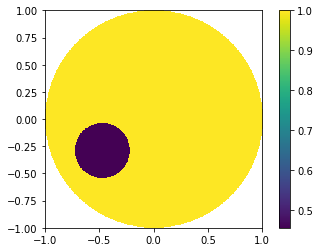

In [ ]:
gridsize = 512
x = np.linspace(-1,1, gridsize)
y = np.linspace(-1,1, gridsize)
xv, yv = np.meshgrid(x, y)
z = np.zeros((gridsize,gridsize))
max = 0
min = 3000
for j in range(gridsize):
    for i in range(gridsize):
        if (xv[i][j]**2 + yv[i][j]**2 <= 1):
            coeff_coord = np.expand_dims(np.array([xv[i][j],yv[i][j]]), axis = 0)
            z[i][j] = get_coord_values(coeff_coord, coef)
            if z[i][j] > max:
                max = z[i][j]
            if z[i][j] < min and z[i][j] > 0:
                min = z[i][j]
znull = np.ma.masked_where(z == 0, z)

fig = plt.figure()
pos = plt.imshow(znull, interpolation='none', extent=[-1, 1, -1, 1])
ax1 = plt.gca()
fig.colorbar(pos, ax=ax1)
saveplot = savepath + 'CoeffPlot' + str(count) + '.eps'
plt.savefig(saveplot, format='eps')
plt.show()

# DataGen for Heart and Lungs

(512, 512)
[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.


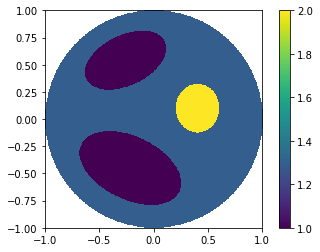

In [ ]:
savepath = '/content/drive/MyDrive/ColabStuff/NewDataNonCont/2ndGen/CoarserData/heartandlungs/NEW'

num_of_samples = 450
savenum = np.min([num_of_samples, 500])
count = 3

mesh_list = []
#domain = Circle(Point(0.,0.),1.0,25)   #50, 10 for Coarser
#mesh = generate_mesh(domain, 5, "cgal")
#mesh_list.append(mesh)

#domain = Circle(Point(0.,0.),1.0,50)
#mesh_eval = generate_mesh(domain, 10, "cgal")

#mesh_list.append(mesh)

# domain = Circle(Point(0.,0.),1.0,100)   ################used for coarser data gen
# mesh = generate_mesh(domain, 20, "cgal")
# mesh_eval = mesh
# mesh_list.append(mesh)
domain = Circle(Point(0.,0.),1.0,200)   
mesh = generate_mesh(domain, 27, "cgal")
mesh_eval = mesh
mesh_list.append(mesh)

#domain = Circle(Point(0.,0.),1.0,200)   ################used for coarser data gen
#mesh = generate_mesh(domain, 20, "cgal")
#mesh_list.append(mesh)

# domain = Circle(Point(0.,0.),1.0,300)   ################used for coarser data gen
# mesh = generate_mesh(domain, 30, "cgal")
#mesh_list.append(mesh)
domain = Circle(Point(0.,0.),1.0,400)   ################used for coarser data gen
mesh = generate_mesh(domain, 50, "cgal")

master_mesh = mesh

groundvalue = 1.0 

t = np.linspace(-1,1,512);
[x1,x2] = np.meshgrid(t,t);
z = x1 + 1j*x2;
c = get_hearts_and_lungs_values(z);
coef = handLinterp(c, t, t)




coeff_coord = master_mesh.coordinates()
nodal_values = get_coord_values(coeff_coord, coef)
test = np.concatenate((coeff_coord, nodal_values), axis = 1)
master_list = []
master_list.append(test)

# Define boundary and coeff condition
coef_list = []
d_data = []
n_data = []



for i in range(num_of_samples):
    gridsize = 256
    alpha = 6.0
    field = gaussian_random_field(alpha, gridsize)
    xx = np.linspace(-1.0, 1.0, num=gridsize)
    yy = np.linspace(-1.0, 1.0, num=gridsize)

    u_D = gaussian_boundary2(field, xx, yy)
    u_D = u_D - Constant(u_D([1,0]))
    
    
    def boundary(x, on_boundary):
        return on_boundary

    V = FunctionSpace(master_mesh, 'CG', 1)
    v2d = vertex_to_dof_map(V)

    bc = DirichletBC(V, u_D, boundary)


    # Define variational problem
    u = TrialFunction(V)
    v = TestFunction(V)
    f = Constant(0.0)
    a = dot(coef*grad(u), grad(v))*dx
    L = f*v*ds

    # Compute solution
    u = Function(V)
    solve(a == L, u, bc)

    nodal_values = np.array(u.vector())
    nodal_values = nodal_values[v2d]
    nodal_values = np.expand_dims(nodal_values, axis = 1)
    test = np.concatenate((master_mesh.coordinates(), nodal_values), axis = 1)
    u_values = test

    ub_interpolant = LinearNDInterpolator(u_values[:,:2], u_values[:,2])
    


    for mesh in mesh_list:
        V = FunctionSpace(mesh, 'CG', 1)

        bc = DirichletBC(V, u_D, boundary)

        v2d = vertex_to_dof_map(V)
        #coeff_coord = mesh.coordinates()
        coeff_coord = mesh_eval.coordinates()
        nodal_values = get_coord_values(coeff_coord, coef)
        test = np.concatenate((coeff_coord, nodal_values), axis = 1)
        #test = np.concatenate((coeff_coord, nodal_values), axis = 1)
        if (i == 0):
            coef_list.append(test)

        bmesh = BoundaryMesh(mesh, "exterior", True)
        Vb = FunctionSpace(bmesh, "Lagrange", 1)
        ub_coord = bmesh.coordinates()

        nodal_values_b = ub_interpolant(ub_coord[:,0], ub_coord[:,1])
        nodal_values_b = np.expand_dims(nodal_values_b, axis = 1)
        test_b = np.concatenate((ub_coord, nodal_values_b), axis = 1)
        test_b[0:3,:] = test_b[[2,0,1],:]
        d_data.append(test_b)

        test_n = interpolate_neumann(ub_coord,u_values, master_mesh.hmax())
        test_n[0:3] = test_n[[2,0,1]]
        n_data.append(test_n)
        dntest = n_data[-1]
    if (i == num_of_samples - 1):
        aname = 'adata{:02d}.mat'.format(count) 
        uname = 'uboundary_data{:02d}.mat'.format(count)
        dnname = 'dn_data{:02d}.mat'.format(count)
        mastera = 'masteradata{:02d}.mat'.format(count) 
        savemat(savepath + aname,
                {"a_data":coef_list})
        savemat(savepath + uname,
                {"u_data":d_data})
        savemat(savepath + dnname,
                {"dn_data":n_data})
        savemat(savepath + mastera,
                {"a_data":master_list})
        
gridsize = 512
x = np.linspace(-1,1, gridsize)
y = np.linspace(-1,1, gridsize)
xv, yv = np.meshgrid(x, y)
z = np.zeros((gridsize,gridsize))
max = 0
min = 3000
for j in range(gridsize):
    for i in range(gridsize):
        if (xv[i][j]**2 + yv[i][j]**2 <= 1):
            coeff_coord = np.expand_dims(np.array([xv[i][j],yv[i][j]]), axis = 0)
            z[i][j] = get_coord_values(coeff_coord, coef)
            if z[i][j] > max:
                max = z[i][j]
            if z[i][j] < min and z[i][j] > 0:
                min = z[i][j]
znull = np.ma.masked_where(z == 0, z)

fig = plt.figure()
pos = plt.imshow(znull, interpolation='none', extent=[-1, 1, -1, 1])
ax1 = plt.gca()
fig.colorbar(pos, ax=ax1)
saveplot = savepath + 'CoeffPlot' + str(count) + '.eps'
plt.savefig(saveplot, format='eps')
plt.show()  



(512, 512)
[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]


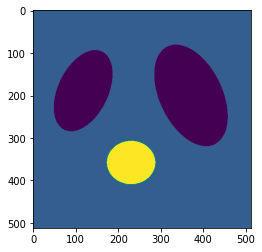

In [ ]:
import numpy as np
#from numpy import *

def get_hearts_and_lungs_values(z):
    heart = 1.7	#2.0 normal
    lung  = 0.7 #0.7 normal
    print(z.shape)
    [zrow,zcol] = z.shape
    z = z[:]
    ans = np.ones(z.shape) 
    x1 = np.real(z)
    x2 = np.imag(z)
    thcknss = .35;

    #Build coarse representation of heart. Planar point (hc1,hc2) is the center of the ellipse
    #describing the heart; numbers he1 and he2 give the eccentrities with respect to radius hR.
    hc1 = -.1;
    hc2 = .4;
    he1 = .8;
    he2 = 1;
    hR  = .2;
    #Compute elliptical "distance" of the evaluation points from heart
    hd  = np.sqrt(he1*(x1-hc1)**2 + he2*(x2-hc2)**2);
    #Set value of conductivity inside the heart
    idx = hd <= hR 
    print(ans)
    ans[idx] = heart;

    #Build coarse representation of two lungs
    l1c1  = .5;
    l1c2  = 0;
    l1e1  = 3;
    l1e2  = 1;
    l1R   = .5;
    fii   = -pi/7;
    rot11 = cos(fii);
    rot12 = sin(fii);
    rot21 = -sin(fii);
    rot22 = cos(fii);
    l1d   = np.sqrt(l1e1*((rot11*x1+rot12*x2)-l1c1)**2 + l1e2*((rot21*x1+rot22*x2)-l1c2)**2);
    ans[l1d <= l1R] = lung;

    l2c1 = -.6;
    l2c2 = 0;
    l2e1 = 3;
    l2e2 = 1;
    l2R  = .4;
    fii   = pi/7;
    rot11 = cos(fii);
    rot12 = sin(fii);
    rot21 = -sin(fii);
    rot22 = cos(fii);
    l2d  = np.sqrt(l2e1*((rot11*x1+rot12*x2)-l2c1)**2 + l2e2*((rot21*x1+rot22*x2)-l2c2)**2);
    ans[l2d <= l2R] = lung;

    #Reshape answer to original form
    ans = np.reshape(ans,[zrow,zcol]);
    return ans + 0.3
t = np.linspace(-1,1,512);
[x1,x2] = np.meshgrid(t,t);
z = x1 + 1j*x2;


c = get_hearts_and_lungs_values(z);

plt.imshow(c)


In [ ]:
class handLinterp(UserExpression):
    def __init__(self, field, xx, yy, **kwargs):
        super().__init__(**kwargs)
        self._f = scipy.interpolate.RectBivariateSpline(xx, yy, field)
    def eval(self, value, x):
        value[0] = self._f(x[0], x[1])[0][0]
    def value_shape(self):
        return ()

try outs to see how mesh works


In [ ]:
 
 mesh = UnitSquareMesh(1,1)
 mesh = refine(mesh)

 n = mesh.coordinates().shape[0]
 ms = np.ones((n,))
 reg = reg_loss(mesh.cells(), mesh.coordinates(), ms)
 print(reg)

[[0.]]


In [ ]:
 Vm = FunctionSpace(mesh, 'Lagrange', 1)
 m = Function(Vm)
 m0 = project(Constant(1.0 ), Vm )
 print(m0.)
 t = assemble( inner(grad(m0), grad(m0))*dx ) 
 print(t)

f_267
2.4158865222393487e-30


In [ ]:
def reg_loss(triangulation, coordinates, ms):
    v1 = np.asarray([[-1, -1]]).T
    v2 = np.asarray([[1, 0]]).T
    v3 = np.asarray([[0, 1]]).T
    num_of_triangles = triangulation.shape[0]
    reg = 0
    for t in range(num_of_triangles):
      m1 = ms[triangulation[t,0]]
      m2 = ms[triangulation[t,1]]
      m3 = ms[triangulation[t,2]]
      x1, y1 = coordinates[triangulation[t,0],:]
      x2, y2 = coordinates[triangulation[t,1],:]
      x3, y3 = coordinates[triangulation[t,2],:]
      B, B_inv, detB, surface_of_triangle = calc_B_inv(x1, y1, x2, y2, x3, y3)
      reg = reg + (m1*m1*( surface_of_triangle*v1.T @B_inv @ B_inv.T @ v1) +
                  2*m1*m2*( surface_of_triangle*v1.T @ B_inv @ B_inv.T @ v2) +
                  2*m1*m3*( surface_of_triangle*v1.T @ B_inv @ B_inv.T @ v3) +
                  m2*m2*( surface_of_triangle*v2.T @ B_inv @ B_inv.T @ v2) +
                  2*m2*m3*( surface_of_triangle*v2.T @ B_inv @ B_inv.T @ v3) +
                  m3*m3*( surface_of_triangle*v3.T @ B_inv @ B_inv.T @ v3) )

    return reg

In [ ]:
def calc_B_inv(x1, y1, x2, y2, x3, y3):
    B = [[x2 - x1, x3 - x1],
         [y2 - y1, y3 - y1]]
    B_inv = np.linalg.inv(B)
    detB = (x2 - x1)*(y3 - y1) - (y2 - y1)*(x3 - x1) 
    surface = np.linalg.det(np.array([[x1,y1, 1], [x2,y2,1], [x3,y3,1]]))
    orientation = np.sign(surface)
    return B, B_inv, detB, 1/2*orientation*surface

# DataGen for Test on mean grid


In [ ]:
class circle_source_ground(UserExpression):
    def __init__(self, radius, center, coeff, **kwargs):
        super().__init__(**kwargs)
        self._radius = radius
        self._center = center
        self._coeff = coeff
    def eval(self, value, x):
        #idxs = ((x[0,:] - self.center[0])**2 + (x[1,:] - self.center[1])**2 < self.radius**2)
        if (x[0] - self._center[0])**2 + (x[1] - self._center[1])**2 < self._radius**2:
            value[0] = self._coeff
        else:
            value[0] = 0.0
    def value_shape(self):
        return ()

In [ ]:
class circle_source(UserExpression):
    def __init__(self, radius, center, coeff, **kwargs):
        super().__init__(**kwargs)
        self._radius = radius
        self._center = center
        self._coeff = coeff
        self._eps = np.random.uniform(low = 0.85, high = 0.99)
    def eval(self, value, x):
        #idxs = ((x[0,:] - self.center[0])**2 + (x[1,:] - self.center[1])**2 < self.radius**2)
        if (x[0] - self._center[0])**2 + (x[1] - self._center[1])**2 < self._radius**2 and (x[0]**2 + x[1]**2) < self._eps**2:
            value[0] = self._coeff
        else:
            value[0] = 0.0
    def value_shape(self):
        return ()
class ellipse_source(UserExpression):
    def __init__(self, rx, ry, center, e_major, e_minor, coeff, **kwargs):
        super().__init__(**kwargs)
        rads = np.sqrt(np.diag([1/rx, 1/ry])) 
        self._coeff = coeff
        self._center = center
        E = np.concatenate((e_major,e_minor), axis = 1)
        self._W = rads @ E
        self._eps = np.random.uniform(low = 0.85, high = 0.99)
    def eval(self, value, x):
        x_cent = np.expand_dims(-np.array([(self._center[0] - x[0]), (self._center[1] - x[1])]), axis = 1)
        if np.linalg.norm(self._W @ x_cent) < 1 and (x[0]**2 + x[1]**2) < self._eps**2:
            value[0] = self._coeff
        else:
            value[0] = 0.0
    def value_shape(self):
        return ()

In [ ]:
class gaussian_boundary2(UserExpression):
    def __init__(self, field, xx, yy, **kwargs):
        super().__init__(**kwargs)
        self._f = scipy.interpolate.RectBivariateSpline(xx, yy, field)
    def eval(self, value, x):
        value[0] = self._f(x[0], x[1])[0][0]
    def value_shape(self):
        return ()

Calling FFC just-in-time (JIT) compiler, this may take some time.


/usr/lib/python3/dist-packages/ufl/exproperators.py:325: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if arg in ("+", "-"):


Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.


/usr/lib/python3/dist-packages/ufl/exproperators.py:325: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if arg in ("+", "-"):


Calling FFC just-in-time (JIT) compiler, this may take some time.


/usr/lib/python3/dist-packages/ufl/exproperators.py:325: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if arg in ("+", "-"):


Calling FFC just-in-time (JIT) compiler, this may take some time.


/usr/lib/python3/dist-packages/ufl/exproperators.py:325: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if arg in ("+", "-"):


0100 samples calculated
0200 samples calculated
0300 samples calculated
0400 samples calculated
500
0500 samples calculated
0600 samples calculated
0700 samples calculated
0800 samples calculated
0900 samples calculated
500
1000 samples calculated
1100 samples calculated
1200 samples calculated
1300 samples calculated
1400 samples calculated
500
1500 samples calculated
1600 samples calculated
1700 samples calculated
1800 samples calculated
1900 samples calculated
500
2000 samples calculated
2100 samples calculated
2200 samples calculated
2300 samples calculated
2400 samples calculated
500
2500 samples calculated
2600 samples calculated
2700 samples calculated
2800 samples calculated
2900 samples calculated
500
3000 samples calculated
3100 samples calculated
3200 samples calculated
3300 samples calculated
3400 samples calculated
500
3500 samples calculated
Calling FFC just-in-time (JIT) compiler, this may take some time.


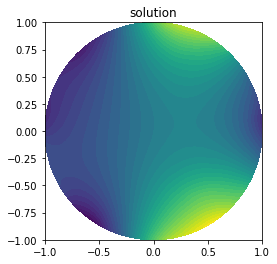

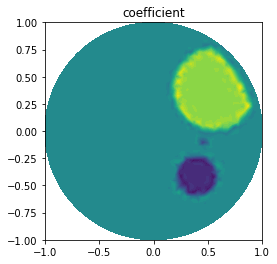

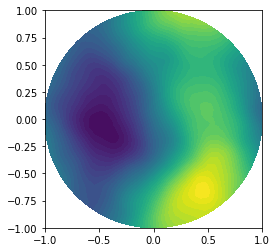

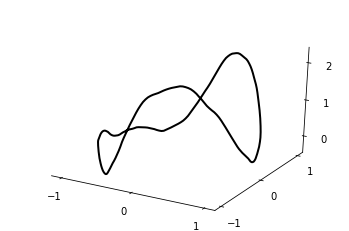

-0.0021100440537310363


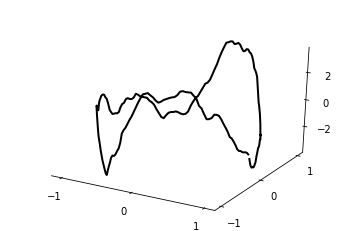

In [ ]:
#coeff_coord_bool = False
#coeff_coord_given = np.load('/content/drive/MyDrive/ColabStuff/NewDataNonCont/2ndGen/CoarserData/CoeffFinderData/coords.npy')
savepath = '/content/drive/MyDrive/ColabStuff/NewDataNonCont/2ndGen/CoarserData/Mean0/NEW/Plots/FinalNonFixed/'
#savepath = '/content/Data/'

num_of_samples = 3500
savenum = np.min([num_of_samples, 500])
count = 15
circle_grid = 100

xi = 2* np.pi *np.cos(np.arange(circle_grid)) /circle_grid
yi = 2* np.pi* np.sin(np.arange(circle_grid)) /circle_grid

mesh_list = []

domain = Circle(Point(0.,0.),1.0,200)   
mesh = generate_mesh(domain, 27, "cgal")

# domain = Circle(Point(0.,0.),1.0,100)   ################used for coarser data gen
# mesh = generate_mesh(domain, 20, "cgal")
mesh_list.append(mesh)
bmesh = BoundaryMesh(mesh, "exterior", True)
Vb = FunctionSpace(bmesh, "Lagrange", 1)
fixed_coord = bmesh.coordinates()



domain = Circle(Point(0.,0.),1.0,400)   ################used for coarser data gen
mesh = generate_mesh(domain, 50, "cgal")


#domain = Circle(Point(0.,0.),1.0,400)   ################used for coarser data gen
#mesh = generate_mesh(domain, 50, "cgal")
#mesh_list.append(mesh)

#mesh = refine(mesh)
master_mesh = mesh

coef_list = []
d_data = []
n_data = []


# Define boundary and coeff condition




for i in range(num_of_samples):
    mean = 0
    gridsize =2*256
    alpha = 6.0
    field = gaussian_random_field(alpha, gridsize)
    xx = np.linspace(-1.0, 1.0, num=gridsize)
    yy = np.linspace(-1.0, 1.0, num=gridsize)

    # f = scipy.interpolate.RectBivariateSpline(xx, yy, field)
    # for j in range(circle_grid):
    #     mean = mean + f(xi[j],yi[j])
    # mean = mean / circle_grid
    # print(mean)
    master_coord = master_mesh.coordinates()

    
    

    u_D = gaussian_boundary2(field, xx, yy)
    u_D = u_D - Constant(u_D([1,0]))
    

    groundvalue = 1.0

    negCond = True
    while negCond:
      shape_list = gen_shape(4)
      coef = circle_source_ground(1.1, [0,0], groundvalue)
      for shape in shape_list:
          coef = coef + shape
      if len([x for x in get_coord_values(master_coord, coef) if x < 0]) == 0:
          negCond = False
      
    
    def boundary(x, on_boundary):
        return on_boundary

    V = FunctionSpace(master_mesh, 'CG', 1)
    v2d = vertex_to_dof_map(V)

    bc = DirichletBC(V, u_D, boundary)


    # Define variational problem
    u = TrialFunction(V)
    v = TestFunction(V)
    f = Constant(0.0)
    a = dot(coef*grad(u), grad(v))*dx
    L = f*v*ds

    # Compute solution
    u = Function(V)
    solve(a == L, u, bc)

    nodal_values = np.array(u.vector())
    nodal_values = nodal_values[v2d]
    nodal_values = np.expand_dims(nodal_values, axis = 1)
    test = np.concatenate((master_mesh.coordinates(), nodal_values), axis = 1)
    u_values = test

    ub_interpolant = LinearNDInterpolator(u_values[:,:2], u_values[:,2])
    


    for mesh in mesh_list:
        V = FunctionSpace(mesh, 'CG', 1)

        bc = DirichletBC(V, u_D, boundary)

        v2d = vertex_to_dof_map(V)
        coeff_coord = mesh.coordinates()
        nodal_values = get_coord_values(coeff_coord, coef)
        test = np.concatenate((coeff_coord, nodal_values), axis = 1)
        coef_list.append(test)

        # bmesh = BoundaryMesh(mesh, "exterior", True)
        # Vb = FunctionSpace(bmesh, "Lagrange", 1)
        # ub_coord = bmesh.coordinates()

        nodal_values_b = ub_interpolant(fixed_coord[:,0], fixed_coord[:,1])
        nodal_values_b = np.expand_dims(nodal_values_b, axis = 1)
        test_b = np.concatenate((fixed_coord, nodal_values_b), axis = 1)
        test_b[0:3,:] = test_b[[2,0,1],:]
        d_data.append(test_b)

        test_n = interpolate_neumann(fixed_coord,u_values, master_mesh.hmax())
        test_n[0:3] = test_n[[2,0,1]]
        n_data.append(test_n)
        dntest = n_data[-1]

    if ((i+1)%savenum == 0):
        aname = 'adata{:02d}.mat'.format(count) 
        uname = 'uboundary_data{:02d}.mat'.format(count)
        dnname = 'dn_data{:02d}.mat'.format(count)
        savemat(savepath + aname,
                {"a_data":coef_list})
        savemat(savepath + uname,
                {"u_data":d_data})
        savemat(savepath + dnname,
                {"dn_data":n_data})
        print(len(d_data))
        coef_list = []
        d_data = []
        n_data = []
        count = count + 1
    if ((i+1) %100 == 0):
        print('{:04d} samples calculated'.format(i+1))
        

coef_FEM = project(coef, V)
u_D1 = project(u_D, V)

# Plot solution and mesh
fig = plt.figure()
plot(u, title = 'solution')
plt.show()
fig = plt.figure()
plot(coef_FEM, title = 'coefficient')
plt.show()
fig = plt.figure()
plot(u_D1)
plt.show()

#fig = plt.figure()
#ax = plt.axes(projection='3d')
#ax.view_init(azim=-90, elev=90)
#ax.plot_trisurf(coef_list[-1][:,0], coef_list[-1][:,1], coef_list[-1][:,2], cmap='viridis', linewidth=0.2, antialiased=True, edgecolor='grey')
#plt.show()

fig = plt.figure()

ax = plt.axes(projection='3d')
ax.set_xticks([-1,0,1])
ax.set_yticks([-1,0,1])
ax.set_zticks([-4,-3,-2,-1,0,1,2,3,4])
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

# Now set color to white (or whatever is "invisible")
ax.xaxis.pane.set_edgecolor('w')
ax.yaxis.pane.set_edgecolor('w')
ax.zaxis.pane.set_edgecolor('w')
ax.grid(False)
ax.plot(test_b[:,0], test_b[:,1], test_b[:,2], label='Ground truth', color='black', linewidth = 2 )
plt.show()

print(test_b[1,2])

test_b[:,2] = dntest
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_xticks([-1,0,1])
ax.set_yticks([-1,0,1])
ax.set_zticks([-4,-2,0,2,4,])
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

# Now set color to white (or whatever is "invisible")
ax.xaxis.pane.set_edgecolor('w')
ax.yaxis.pane.set_edgecolor('w')
ax.zaxis.pane.set_edgecolor('w')
ax.grid(False)
ax.plot(test_b[:,0], test_b[:,1], test_b[:,2], label='Ground truth', color='black', linewidth = 2 )
#ax.scatter(test_b[0:3,0], test_b[0:3,1], test_b[0:3,2])
plt.show()


In [ ]:
domain = Circle(Point(0.,0.),1.0,200)   
mesh = generate_mesh(domain, 27, "cgal")
# coordinates = np.load('/content/drive/MyDrive/ColabStuff/NewDataNonCont/2ndGen/CoarserData/CoeffFinderData/coords.npy')
# triangulation = np.load('/content/drive/MyDrive/ColabStuff/NewDataNonCont/2ndGen/CoarserData/CoeffFinderData/cells.npy')
np.save('/content/drive/MyDrive/ColabStuff/NewDataNonCont/2ndGen/CoarserData/CoeffFinderData/coords2.npy', mesh.coordinates())
np.save(('/content/drive/MyDrive/ColabStuff/NewDataNonCont/2ndGen/CoarserData/CoeffFinderData/cells.npy'), mesh.cells())


# DataGen for mean grid and 1 coeff near boundary

In [ ]:
class circle_source_ground(UserExpression):
    def __init__(self, radius, center, coeff, **kwargs):
        super().__init__(**kwargs)
        self._radius = radius
        self._center = center
        self._coeff = coeff
    def eval(self, value, x):
        #idxs = ((x[0,:] - self.center[0])**2 + (x[1,:] - self.center[1])**2 < self.radius**2)
        if (x[0] - self._center[0])**2 + (x[1] - self._center[1])**2 < self._radius**2:
            value[0] = self._coeff
        else:
            value[0] = 0.0
    def value_shape(self):
        return ()

In [ ]:
class circle_source(UserExpression):
    def __init__(self, radius, center, coeff, **kwargs):
        super().__init__(**kwargs)
        self._radius = radius
        self._center = center
        self._coeff = coeff
    def eval(self, value, x):
        #idxs = ((x[0,:] - self.center[0])**2 + (x[1,:] - self.center[1])**2 < self.radius**2)
        if (x[0] - self._center[0])**2 + (x[1] - self._center[1])**2 < self._radius**2 and (x[0]**2 + x[1]**2) < 0.9**2:
            value[0] = self._coeff
        else:
            value[0] = 0.0
    def value_shape(self):
        return ()
class ellipse_source(UserExpression):
    def __init__(self, rx, ry, center, e_major, e_minor, coeff, **kwargs):
        super().__init__(**kwargs)
        rads = np.sqrt(np.diag([1/rx, 1/ry])) 
        self._coeff = coeff
        self._center = center
        E = np.concatenate((e_major,e_minor), axis = 1)
        self._W = rads @ E
    def eval(self, value, x):
        x_cent = np.expand_dims(-np.array([(self._center[0] - x[0]), (self._center[1] - x[1])]), axis = 1)
        if np.linalg.norm(self._W @ x_cent) < 1 and (x[0]**2 + x[1]**2) < 0.9**2:
            value[0] = self._coeff
        else:
            value[0] = 0.0
    def value_shape(self):
        return ()

In [ ]:

savepath = '/content/drive/MyDrive/ColabStuff/NewDataNonCont/2ndGen/CoarserData/CoeffFinderData/'

num_of_samples = 450
savenum = min([num_of_samples, 500])
count = 5

mesh_list = []
#domain = Circle(Point(0.,0.),1.0,25)   #50, 10 for Coarser
#mesh = generate_mesh(domain, 5, "cgal")
#mesh_list.append(mesh)

#domain = Circle(Point(0.,0.),1.0,50)
#mesh_eval = generate_mesh(domain, 10, "cgal")

#mesh_list.append(mesh)

domain = Circle(Point(0.,0.),1.0,200)   
mesh = generate_mesh(domain, 27, "cgal")
# domain = Circle(Point(0.,0.),1.0,100)   ################used for coarser data gen
# mesh = generate_mesh(domain, 20, "cgal")
mesh_eval = mesh
mesh_list.append(mesh)

#domain = Circle(Point(0.,0.),1.0,200)   ################used for coarser data gen
#mesh = generate_mesh(domain, 20, "cgal")
#mesh_list.append(mesh)

domain = Circle(Point(0.,0.),1.0,300)   ################used for coarser data gen
mesh = generate_mesh(domain, 30, "cgal")
#mesh_list.append(mesh)


master_mesh = mesh

groundvalue = 1.0

shape_list = gen_shape(4)
coef = circle_source_ground(1.1, [0,0], groundvalue)
for shape in shape_list:
    coef = coef + shape

coeff_coord = master_mesh.coordinates()
nodal_values = get_coord_values(coeff_coord, coef)
test = np.concatenate((coeff_coord, nodal_values), axis = 1)
master_list = []
master_list.append(test)

# Define boundary and coeff condition
coef_list = []
d_data = []
n_data = []



for i in range(num_of_samples):
    gridsize = 256
    alpha = 6.0
    field = gaussian_random_field(alpha, gridsize)
    xx = np.linspace(-1.0, 1.0, num=gridsize)
    yy = np.linspace(-1.0, 1.0, num=gridsize)

    u_D = gaussian_boundary2(field, xx, yy)
    u_D = u_D - Constant(u_D([1,0]))
    
    
    def boundary(x, on_boundary):
        return on_boundary

    V = FunctionSpace(master_mesh, 'CG', 1)
    v2d = vertex_to_dof_map(V)

    bc = DirichletBC(V, u_D, boundary)


    # Define variational problem
    u = TrialFunction(V)
    v = TestFunction(V)
    f = Constant(0.0)
    a = dot(coef*grad(u), grad(v))*dx
    L = f*v*ds

    # Compute solution
    u = Function(V)
    solve(a == L, u, bc)

    nodal_values = np.array(u.vector())
    nodal_values = nodal_values[v2d]
    nodal_values = np.expand_dims(nodal_values, axis = 1)
    test = np.concatenate((master_mesh.coordinates(), nodal_values), axis = 1)
    u_values = test

    ub_interpolant = LinearNDInterpolator(u_values[:,:2], u_values[:,2])
    


    for mesh in mesh_list:
        V = FunctionSpace(mesh, 'CG', 1)

        bc = DirichletBC(V, u_D, boundary)

        v2d = vertex_to_dof_map(V)
        #coeff_coord = mesh.coordinates()
        coeff_coord = mesh_eval.coordinates()
        nodal_values = get_coord_values(coeff_coord, coef)
        test = np.concatenate((coeff_coord, nodal_values), axis = 1)
        #test = np.concatenate((coeff_coord, nodal_values), axis = 1)
        if (i == 0):
            coef_list.append(test)

        bmesh = BoundaryMesh(mesh, "exterior", True)
        Vb = FunctionSpace(bmesh, "Lagrange", 1)
        ub_coord = bmesh.coordinates()

        nodal_values_b = ub_interpolant(ub_coord[:,0], ub_coord[:,1])
        nodal_values_b = np.expand_dims(nodal_values_b, axis = 1)
        test_b = np.concatenate((ub_coord, nodal_values_b), axis = 1)
        test_b[0:3,:] = test_b[[2,0,1],:]
        d_data.append(test_b)

        test_n = interpolate_neumann(ub_coord,u_values, master_mesh.hmax())
        test_n[0:3] = test_n[[2,0,1]]
        n_data.append(test_n)
        dntest = n_data[-1]
    if (i == num_of_samples - 1):
        aname = 'adata{:02d}.mat'.format(count) 
        uname = 'uboundary_data{:02d}.mat'.format(count)
        dnname = 'dn_data{:02d}.mat'.format(count)
        mastera = 'masteradata{:02d}.mat'.format(count) 
        savemat(savepath + aname,
                {"a_data":coef_list})
        savemat(savepath + uname,
                {"u_data":d_data})
        savemat(savepath + dnname,
                {"dn_data":n_data})
        savemat(savepath + mastera,
                {"a_data":master_list})
        
        



/usr/lib/python3/dist-packages/ufl/exproperators.py:325: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if arg in ("+", "-"):


Calling FFC just-in-time (JIT) compiler, this may take some time.


/usr/lib/python3/dist-packages/ufl/exproperators.py:325: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if arg in ("+", "-"):


# Plotting for Thesis

In [ ]:
class circle_source_ground(UserExpression):
    def __init__(self, radius, center, coeff, **kwargs):
        super().__init__(**kwargs)
        self._radius = radius
        self._center = center
        self._coeff = coeff
    def eval(self, value, x):
        #idxs = ((x[0,:] - self.center[0])**2 + (x[1,:] - self.center[1])**2 < self.radius**2)
        if (x[0] - self._center[0])**2 + (x[1] - self._center[1])**2 < self._radius**2:
            value[0] = self._coeff
        else:
            value[0] = 0.0
    def value_shape(self):
        return ()

In [ ]:
class circle_source(UserExpression):
    def __init__(self, radius, center, coeff, **kwargs):
        super().__init__(**kwargs)
        self._radius = radius
        self._center = center
        self._coeff = coeff
        self._eps = np.random.uniform(low = 0.85, high = 0.99)
    def eval(self, value, x):
        #idxs = ((x[0,:] - self.center[0])**2 + (x[1,:] - self.center[1])**2 < self.radius**2)
        if (x[0] - self._center[0])**2 + (x[1] - self._center[1])**2 < self._radius**2 and (x[0]**2 + x[1]**2) < self._eps**2:
            value[0] = self._coeff
        else:
            value[0] = 0.0
    def value_shape(self):
        return ()
class ellipse_source(UserExpression):
    def __init__(self, rx, ry, center, e_major, e_minor, coeff, **kwargs):
        super().__init__(**kwargs)
        rads = np.sqrt(np.diag([1/rx, 1/ry])) 
        self._coeff = coeff
        self._center = center
        E = np.concatenate((e_major,e_minor), axis = 1)
        self._W = rads @ E
        self._eps = np.random.uniform(low = 0.85, high = 0.99)
    def eval(self, value, x):
        x_cent = np.expand_dims(-np.array([(self._center[0] - x[0]), (self._center[1] - x[1])]), axis = 1)
        if np.linalg.norm(self._W @ x_cent) < 1 and (x[0]**2 + x[1]**2) < self._eps**2:
            value[0] = self._coeff
        else:
            value[0] = 0.0
    def value_shape(self):
        return ()

In [ ]:
class gaussian_boundary2(UserExpression):
    def __init__(self, field, xx, yy, **kwargs):
        super().__init__(**kwargs)
        self._f = scipy.interpolate.RectBivariateSpline(xx, yy, field)
    def eval(self, value, x):
        value[0] = self._f(x[0], x[1])[0][0]
    def value_shape(self):
        return ()

/usr/lib/python3/dist-packages/ufl/exproperators.py:325: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if arg in ("+", "-"):


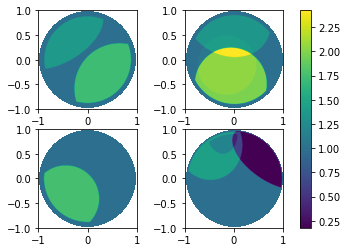

In [ ]:
gridsize = 512

x = np.linspace(-1,1, gridsize)
y = np.linspace(-1,1, gridsize)
xv, yv = np.meshgrid(x, y)
z = np.zeros((gridsize,gridsize))

num_of_samples = 1
num_of_examples = 4
count = 8
circle_grid = 100

xi = 2* np.pi *np.cos(np.arange(circle_grid)) /circle_grid
yi = 2* np.pi* np.sin(np.arange(circle_grid)) /circle_grid

mesh_list = []


domain = Circle(Point(0.,0.),1.0,100)   ################used for coarser data gen
mesh = generate_mesh(domain, 20, "cgal")
mesh_list.append(mesh)
bmesh = BoundaryMesh(mesh, "exterior", True)
Vb = FunctionSpace(bmesh, "Lagrange", 1)
fixed_coord = bmesh.coordinates()



domain = Circle(Point(0.,0.),1.0,300)   ################used for coarser data gen
mesh = generate_mesh(domain, 30, "cgal")


#domain = Circle(Point(0.,0.),1.0,400)   ################used for coarser data gen
#mesh = generate_mesh(domain, 50, "cgal")
#mesh_list.append(mesh)

#mesh = refine(mesh)
master_mesh = mesh


fig, axes = plt.subplots(nrows=2, ncols=2)
max = 0
min = 12
zlist = []


# Define boundary and coeff condition

for ax in axes.flat:
    z = np.zeros((gridsize,gridsize))
    for i in range(num_of_samples):
        mean = 0
        gridsize =2*256
        alpha = 6.0
        field = gaussian_random_field(alpha, gridsize)
        xx = np.linspace(-1.0, 1.0, num=gridsize)
        yy = np.linspace(-1.0, 1.0, num=gridsize)

        master_coord = master_mesh.coordinates()
        
        

        u_D = gaussian_boundary2(field, xx, yy)
        u_D = u_D - Constant(u_D([1,0]))
        

        groundvalue = 1.0

        negCond = True
        while negCond:
          shape_list = gen_shape(4)
          coef = circle_source_ground(1.1, [0,0], groundvalue)
          for shape in shape_list:
              coef = coef + shape
          if len([x for x in get_coord_values(master_coord, coef) if x < 0]) == 0:
              negCond = False


    
    for i in range(gridsize):
        for j in range(gridsize):
            if (xv[i][j]**2 + yv[i][j]**2 <= 1):
                coeff_coord = np.expand_dims(np.array([xv[i][j],yv[i][j]]), axis = 0)
                z[i][j] = get_coord_values(coeff_coord, coef)
                if z[i][j] > max:
                    max = z[i][j]
                if z[i][j] < min and z[i][j] > 0:
                    min = z[i][j]
    znull = np.ma.masked_where(z == 0, z)
    zlist.append(z)
count = 0
for ax in axes.flat:
    znull = np.ma.masked_where(zlist[count] == 0, zlist[count])
    im = ax.imshow(znull, extent=[-1, 1, -1, 1], vmin = min, vmax = max)
    count = count + 1
fig.colorbar(im, ax=axes.ravel().tolist())
plt.savefig('Data/FixedCoeff.eps', format='eps')
plt.savefig('Data/FixedCoeff.png')
plt.show()

In [ ]:
plt.savefig('Data/FixedCoeff.png')

<Figure size 432x288 with 0 Axes>

In [ ]:
num_of_samples = 2
savenum = 100000
count = 1
circle_grid = 100

xi = 2* np.pi *np.cos(np.arange(circle_grid)) /circle_grid
yi = 2* np.pi* np.sin(np.arange(circle_grid)) /circle_grid

mesh_list = []


domain = Circle(Point(0.,0.),1.0,100)   ################used for coarser data gen
mesh = generate_mesh(domain, 20, "cgal")
mesh_list.append(mesh)
bmesh = BoundaryMesh(mesh, "exterior", True)
Vb = FunctionSpace(bmesh, "Lagrange", 1)
fixed_coord = bmesh.coordinates()



domain = Circle(Point(0.,0.),1.0,300)   ################used for coarser data gen
mesh = generate_mesh(domain, 30, "cgal")


#domain = Circle(Point(0.,0.),1.0,400)   ################used for coarser data gen
#mesh = generate_mesh(domain, 50, "cgal")
#mesh_list.append(mesh)

#mesh = refine(mesh)
master_mesh = mesh

coef_list = []
d_data = []
n_data = []


# Define boundary and coeff condition




for i in range(num_of_samples):
    mean = 0
    gridsize =2*256
    alpha = 6.0
    field = gaussian_random_field(alpha, gridsize)
    xx = np.linspace(-1.0, 1.0, num=gridsize)
    yy = np.linspace(-1.0, 1.0, num=gridsize)

    # f = scipy.interpolate.RectBivariateSpline(xx, yy, field)
    # for j in range(circle_grid):
    #     mean = mean + f(xi[j],yi[j])
    # mean = mean / circle_grid
    # print(mean)
    master_coord = master_mesh.coordinates()

    
    

    u_D = gaussian_boundary2(field, xx, yy)
    u_D = u_D - Constant(u_D([1,0]))
    

    groundvalue = 1.0

    # negCond = True
    # while negCond:
    #   shape_list = gen_shape(4)
    #   coef = circle_source_ground(1.1, [0,0], groundvalue)
    #   for shape in shape_list:
    #       coef = coef + shape
    #   if len([x for x in get_coord_values(master_coord, coef) if x < 0]) == 0:
    #       negCond = False
      
    
    def boundary(x, on_boundary):
        return on_boundary

    V = FunctionSpace(master_mesh, 'CG', 1)
    v2d = vertex_to_dof_map(V)

    bc = DirichletBC(V, u_D, boundary)


    # Define variational problem
    u = TrialFunction(V)
    v = TestFunction(V)
    f = Constant(0.0)
    a = dot(coef*grad(u), grad(v))*dx
    L = f*v*ds

    # Compute solution
    u = Function(V)
    solve(a == L, u, bc)

    nodal_values = np.array(u.vector())
    nodal_values = nodal_values[v2d]
    nodal_values = np.expand_dims(nodal_values, axis = 1)
    test = np.concatenate((master_mesh.coordinates(), nodal_values), axis = 1)
    u_values = test

    ub_interpolant = LinearNDInterpolator(u_values[:,:2], u_values[:,2])
    


    for mesh in mesh_list:
        V = FunctionSpace(mesh, 'CG', 1)

        bc = DirichletBC(V, u_D, boundary)

        v2d = vertex_to_dof_map(V)
        coeff_coord = mesh.coordinates()
        nodal_values = get_coord_values(coeff_coord, coef)
        test = np.concatenate((coeff_coord, nodal_values), axis = 1)
        coef_list.append(test)

        # bmesh = BoundaryMesh(mesh, "exterior", True)
        # Vb = FunctionSpace(bmesh, "Lagrange", 1)
        # ub_coord = bmesh.coordinates()

        nodal_values_b = ub_interpolant(fixed_coord[:,0], fixed_coord[:,1])
        nodal_values_b = np.expand_dims(nodal_values_b, axis = 1)
        test_b = np.concatenate((fixed_coord, nodal_values_b), axis = 1)
        test_b[0:3,:] = test_b[[2,0,1],:]
        d_data.append(test_b)

        test_n = interpolate_neumann(fixed_coord,u_values, master_mesh.hmax())
        test_n[0:3] = test_n[[2,0,1]]
        n_data.append(test_n)
        dntest = n_data[-1]

    if ((i+1)%savenum == 0):
        aname = 'adata{:02d}.mat'.format(count) 
        uname = 'uboundary_data{:02d}.mat'.format(count)
        dnname = 'dn_data{:02d}.mat'.format(count)
        savemat(savepath + aname,
                {"a_data":coef_list})
        savemat(savepath + uname,
                {"u_data":d_data})
        savemat(savepath + dnname,
                {"dn_data":n_data})
        print(len(d_data))
        coef_list = []
        d_data = []
        n_data = []
        count = count + 1
    if ((i+1) %100 == 0):
        print('{:04d} samples calculated'.format(i+1))
        

coef_FEM = project(coef, V)
u_D1 = project(u_D, V)

# Plot solution and mesh
fig = plt.figure()
plot(u, title = 'solution')
plt.show()
fig = plt.figure()
plot(coef_FEM, title = 'coefficient')
plt.show()
fig = plt.figure()
plot(u_D1)
plt.show()

#fig = plt.figure()
#ax = plt.axes(projection='3d')
#ax.view_init(azim=-90, elev=90)
#ax.plot_trisurf(coef_list[-1][:,0], coef_list[-1][:,1], coef_list[-1][:,2], cmap='viridis', linewidth=0.2, antialiased=True, edgecolor='grey')
#plt.show()

fig = plt.figure()

ax = plt.axes(projection='3d')
ax.set_xticks([-1,0,1])
ax.set_yticks([-1,0,1])
ax.set_zticks([-4,-3,-2,-1,0,1,2,3,4])
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

# Now set color to white (or whatever is "invisible")
ax.xaxis.pane.set_edgecolor('w')
ax.yaxis.pane.set_edgecolor('w')
ax.zaxis.pane.set_edgecolor('w')
ax.grid(False)
ax.plot(test_b[:,0], test_b[:,1], test_b[:,2], label='Ground truth', color='black', linewidth = 2 )
plt.savefig('Data/BdataExDD2.eps', format='eps')
plt.savefig('Data/BdataExDD2.png')
plt.show()

print(test_b[1,2])

test_b[:,2] = dntest
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_xticks([-1,0,1])
ax.set_yticks([-1,0,1])
ax.set_zticks([-4,-2,0,2,4,])
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

# Now set color to white (or whatever is "invisible")
ax.xaxis.pane.set_edgecolor('w')
ax.yaxis.pane.set_edgecolor('w')
ax.zaxis.pane.set_edgecolor('w')
ax.grid(False)
ax.plot(test_b[:,0], test_b[:,1], test_b[:,2], label='Ground truth', color='black', linewidth = 2 )
# plt.savefig('Data/BdataExN1.eps', format='eps')
# plt.savefig('Data/BdataExN1.png')
#ax.scatter(test_b[0:3,0], test_b[0:3,1], test_b[0:3,2])
plt.show()

Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.


NameError: ignored

# Fixed DataGen

In [ ]:
class circle_source_ground(UserExpression):
    def __init__(self, radius, center, coeff, **kwargs):
        super().__init__(**kwargs)
        self._radius = radius
        self._center = center
        self._coeff = coeff
    def eval(self, value, x):
        #idxs = ((x[0,:] - self.center[0])**2 + (x[1,:] - self.center[1])**2 < self.radius**2)
        if (x[0] - self._center[0])**2 + (x[1] - self._center[1])**2 < self._radius**2:
            value[0] = self._coeff
        else:
            value[0] = 0.0
    def value_shape(self):
        return ()

In [ ]:
class circle_source(UserExpression):
    def __init__(self, radius, center, coeff, **kwargs):
        super().__init__(**kwargs)
        self._radius = radius
        self._center = center
        self._coeff = coeff
        self._eps = np.random.uniform(low = 0.85, high = 0.99)
    def eval(self, value, x):
        #idxs = ((x[0,:] - self.center[0])**2 + (x[1,:] - self.center[1])**2 < self.radius**2)
        if (x[0] - self._center[0])**2 + (x[1] - self._center[1])**2 < self._radius**2 and (x[0]**2 + x[1]**2) < self._eps**2:
            value[0] = self._coeff
        else:
            value[0] = 0.0
    def value_shape(self):
        return ()
class ellipse_source(UserExpression):
    def __init__(self, rx, ry, center, e_major, e_minor, coeff, **kwargs):
        super().__init__(**kwargs)
        rads = np.sqrt(np.diag([1/rx, 1/ry])) 
        self._coeff = coeff
        self._center = center
        E = np.concatenate((e_major,e_minor), axis = 1)
        self._W = rads @ E
        self._eps = np.random.uniform(low = 0.85, high = 0.99)
    def eval(self, value, x):
        x_cent = np.expand_dims(-np.array([(self._center[0] - x[0]), (self._center[1] - x[1])]), axis = 1)
        if np.linalg.norm(self._W @ x_cent) < 1 and (x[0]**2 + x[1]**2) < self._eps**2:
            value[0] = self._coeff
        else:
            value[0] = 0.0
    def value_shape(self):
        return ()

In [ ]:
class gaussian_boundary2(UserExpression):
    def __init__(self, field, xx, yy, **kwargs):
        super().__init__(**kwargs)
        self._f = scipy.interpolate.RectBivariateSpline(xx, yy, field)
    def eval(self, value, x):
        value[0] = self._f(x[0], x[1])[0][0]
    def value_shape(self):
        return ()

/usr/lib/python3/dist-packages/ufl/exproperators.py:325: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if arg in ("+", "-"):


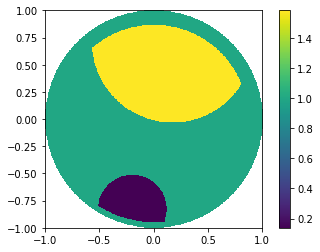

In [ ]:
# groundvalue = 1
# negCond = True
# while negCond:
#     shape_list = gen_shape(4)
#     coef = circle_source_ground(1.1, [0,0], groundvalue)
#     for shape in shape_list:
#         coef = coef + shape
#     if len([x for x in get_coord_values(master_coord, coef) if x < 0]) == 0:
#         negCond = False
gridsize = 512
x = np.linspace(-1,1, gridsize)
y = np.linspace(-1,1, gridsize)
xv, yv = np.meshgrid(x, y)
z = np.zeros((gridsize,gridsize))
max = 0
min = 3000
for j in range(gridsize):
    for i in range(gridsize):
        if (xv[i][j]**2 + yv[i][j]**2 <= 1):
            coeff_coord = np.expand_dims(np.array([xv[i][j],yv[i][j]]), axis = 0)
            z[i][j] = get_coord_values(coeff_coord, coef)
            if z[i][j] > max:
                max = z[i][j]
            if z[i][j] < min and z[i][j] > 0:
                min = z[i][j]
znull = np.ma.masked_where(z == 0, z)

fig = plt.figure()
pos = plt.imshow(znull, interpolation='none', extent=[-1, 1, -1, 1])
ax1 = plt.gca()
fig.colorbar(pos, ax=ax1)
plt.savefig('Data/FixedCoeff.eps', format='eps')
plt.show()


file_name = "Data/coeff_list.pkl"
open_file = open(file_name, "wb")
pickle.dump(save_shape(shape_list), open_file)
open_file.close()


/usr/lib/python3/dist-packages/ufl/exproperators.py:325: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if arg in ("+", "-"):


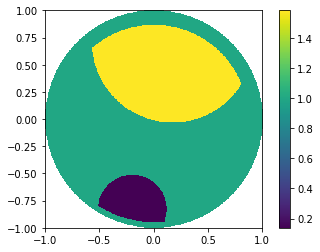

In [ ]:
import pickle
with open('coeff_list.pkl', 'rb') as f:
    shapes = pickle.load(f)
shape_list = load_shape(shapes)
groundvalue = 1

coef = circle_source_ground(1.1, [0,0], groundvalue)
for shape in shape_list:
    coef = coef + shape
gridsize = 512
x = np.linspace(-1,1, gridsize)
y = np.linspace(-1,1, gridsize)
xv, yv = np.meshgrid(x, y)
z = np.zeros((gridsize,gridsize))
max = 0
min = 3000
for j in range(gridsize):
    for i in range(gridsize):
        if (xv[i][j]**2 + yv[i][j]**2 <= 1):
            coeff_coord = np.expand_dims(np.array([xv[i][j],yv[i][j]]), axis = 0)
            z[i][j] = get_coord_values(coeff_coord, coef)
            if z[i][j] > max:
                max = z[i][j]
            if z[i][j] < min and z[i][j] > 0:
                min = z[i][j]
znull = np.ma.masked_where(z == 0, z)

fig = plt.figure()
pos = plt.imshow(znull, interpolation='none', extent=[-1, 1, -1, 1])
ax1 = plt.gca()
fig.colorbar(pos, ax=ax1)
plt.savefig('Data/FixedCoeff.eps', format='eps')
plt.show()

/usr/lib/python3/dist-packages/ufl/exproperators.py:325: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if arg in ("+", "-"):


0100 samples calculated
0200 samples calculated
0300 samples calculated
0400 samples calculated
500
0500 samples calculated
0600 samples calculated
0700 samples calculated
0800 samples calculated
0900 samples calculated
500
1000 samples calculated
1100 samples calculated
1200 samples calculated
1300 samples calculated
1400 samples calculated
500
1500 samples calculated
1600 samples calculated
1700 samples calculated
1800 samples calculated
1900 samples calculated
500
2000 samples calculated
Calling FFC just-in-time (JIT) compiler, this may take some time.


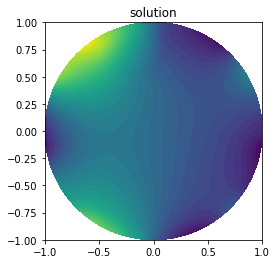

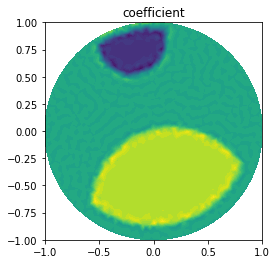

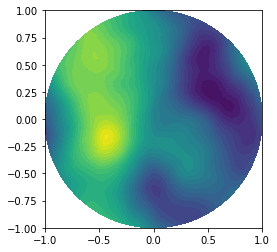

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


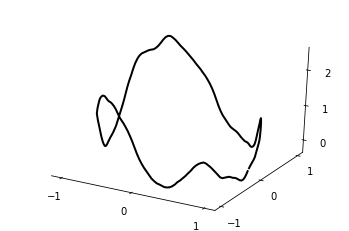

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


-0.001194469938971206


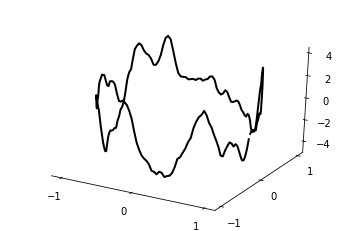

In [ ]:
#coeff_coord_bool = False
#coeff_coord_given = np.load('/content/drive/MyDrive/ColabStuff/NewDataNonCont/2ndGen/CoarserData/CoeffFinderData/coords.npy')
savepath = '/content/drive/MyDrive/ColabStuff/NewDataNonCont/2ndGen/CoarserData/Mean0/NEW/Plots/200'
#savepath = '/content/Data/'

num_of_samples = 2000
savenum = np.min([num_of_samples, 500])
count = 1
circle_grid = 100

xi = 2* np.pi *np.cos(np.arange(circle_grid)) /circle_grid
yi = 2* np.pi* np.sin(np.arange(circle_grid)) /circle_grid

mesh_list = []


# domain = Circle(Point(0.,0.),1.0,100)   ################used for coarser data gen
# mesh = generate_mesh(domain, 20, "cgal")

domain = Circle(Point(0.,0.),1.0,200)   
mesh = generate_mesh(domain, 27, "cgal")

mesh_list.append(mesh)
bmesh = BoundaryMesh(mesh, "exterior", True)
Vb = FunctionSpace(bmesh, "Lagrange", 1)
fixed_coord = bmesh.coordinates()



domain = Circle(Point(0.,0.),1.0,200)   
mesh = generate_mesh(domain, 27, "cgal")


#domain = Circle(Point(0.,0.),1.0,400)   ################used for coarser data gen
#mesh = generate_mesh(domain, 50, "cgal")
#mesh_list.append(mesh)

#mesh = refine(mesh)
domain = Circle(Point(0.,0.),1.0,400)   ################used for coarser data gen
mesh = generate_mesh(domain, 50, "cgal")
master_mesh = mesh

coef_list = []
d_data = []
n_data = []


# Define boundary and coeff condition




for i in range(num_of_samples):
    mean = 0
    gridsize =2*256
    alpha = 6.0
    field = gaussian_random_field(alpha, gridsize)
    xx = np.linspace(-1.0, 1.0, num=gridsize)
    yy = np.linspace(-1.0, 1.0, num=gridsize)

    # f = scipy.interpolate.RectBivariateSpline(xx, yy, field)
    # for j in range(circle_grid):
    #     mean = mean + f(xi[j],yi[j])
    # mean = mean / circle_grid
    # print(mean)
    master_coord = master_mesh.coordinates()

    
    

    u_D = gaussian_boundary2(field, xx, yy)
    u_D = u_D - Constant(u_D([1,0]))
    

    groundvalue = 1.0

    # negCond = True
    # while negCond:
    #   shape_list = gen_shape(4)
    #   coef = circle_source_ground(1.1, [0,0], groundvalue)
    #   for shape in shape_list:
    #       coef = coef + shape
    #   if len([x for x in get_coord_values(master_coord, coef) if x < 0]) == 0:
    #       negCond = False
      
    
    def boundary(x, on_boundary):
        return on_boundary

    V = FunctionSpace(master_mesh, 'CG', 1)
    v2d = vertex_to_dof_map(V)

    bc = DirichletBC(V, u_D, boundary)


    # Define variational problem
    u = TrialFunction(V)
    v = TestFunction(V)
    f = Constant(0.0)
    a = dot(coef*grad(u), grad(v))*dx
    L = f*v*ds

    # Compute solution
    u = Function(V)
    solve(a == L, u, bc)

    nodal_values = np.array(u.vector())
    nodal_values = nodal_values[v2d]
    nodal_values = np.expand_dims(nodal_values, axis = 1)
    test = np.concatenate((master_mesh.coordinates(), nodal_values), axis = 1)
    u_values = test

    ub_interpolant = LinearNDInterpolator(u_values[:,:2], u_values[:,2])
    


    for mesh in mesh_list:
        V = FunctionSpace(mesh, 'CG', 1)

        bc = DirichletBC(V, u_D, boundary)

        v2d = vertex_to_dof_map(V)
        coeff_coord = mesh.coordinates()
        nodal_values = get_coord_values(coeff_coord, coef)
        test = np.concatenate((coeff_coord, nodal_values), axis = 1)
        coef_list.append(test)

        # bmesh = BoundaryMesh(mesh, "exterior", True)
        # Vb = FunctionSpace(bmesh, "Lagrange", 1)
        # ub_coord = bmesh.coordinates()

        nodal_values_b = ub_interpolant(fixed_coord[:,0], fixed_coord[:,1])
        nodal_values_b = np.expand_dims(nodal_values_b, axis = 1)
        test_b = np.concatenate((fixed_coord, nodal_values_b), axis = 1)
        test_b[0:3,:] = test_b[[2,0,1],:]
        d_data.append(test_b)

        test_n = interpolate_neumann(fixed_coord,u_values, master_mesh.hmax())
        test_n[0:3] = test_n[[2,0,1]]
        n_data.append(test_n)
        dntest = n_data[-1]

    if ((i+1)%savenum == 0):
        aname = 'adata{:02d}.mat'.format(count) 
        uname = 'uboundary_data{:02d}.mat'.format(count)
        dnname = 'dn_data{:02d}.mat'.format(count)
        savemat(savepath + aname,
                {"a_data":coef_list})
        savemat(savepath + uname,
                {"u_data":d_data})
        savemat(savepath + dnname,
                {"dn_data":n_data})
        print(len(d_data))
        coef_list = []
        d_data = []
        n_data = []
        count = count + 1
    if ((i+1) %100 == 0):
        print('{:04d} samples calculated'.format(i+1))
        

coef_FEM = project(coef, V)
u_D1 = project(u_D, V)

# Plot solution and mesh
fig = plt.figure()
plot(u, title = 'solution')
plt.show()
fig = plt.figure()
plot(coef_FEM, title = 'coefficient')
plt.show()
fig = plt.figure()
plot(u_D1)
plt.show()

#fig = plt.figure()
#ax = plt.axes(projection='3d')
#ax.view_init(azim=-90, elev=90)
#ax.plot_trisurf(coef_list[-1][:,0], coef_list[-1][:,1], coef_list[-1][:,2], cmap='viridis', linewidth=0.2, antialiased=True, edgecolor='grey')
#plt.show()

fig = plt.figure()

ax = plt.axes(projection='3d')
ax.set_xticks([-1,0,1])
ax.set_yticks([-1,0,1])
ax.set_zticks([-4,-3,-2,-1,0,1,2,3,4])
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

# Now set color to white (or whatever is "invisible")
ax.xaxis.pane.set_edgecolor('w')
ax.yaxis.pane.set_edgecolor('w')
ax.zaxis.pane.set_edgecolor('w')
ax.grid(False)
ax.plot(test_b[:,0], test_b[:,1], test_b[:,2], label='Ground truth', color='black', linewidth = 2 )
plt.savefig('Data/BdataEx1.eps', format='eps')
plt.savefig('Data/BdataEx1.png')
plt.show()

print(test_b[1,2])

test_b[:,2] = dntest
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_xticks([-1,0,1])
ax.set_yticks([-1,0,1])
ax.set_zticks([-4,-2,0,2,4,])
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

# Now set color to white (or whatever is "invisible")
ax.xaxis.pane.set_edgecolor('w')
ax.yaxis.pane.set_edgecolor('w')
ax.zaxis.pane.set_edgecolor('w')
ax.grid(False)
ax.plot(test_b[:,0], test_b[:,1], test_b[:,2], label='Ground truth', color='black', linewidth = 2 )
plt.savefig('Data/BdataEx1.eps', format='eps')
plt.savefig('Data/BdataEx1.png')
#ax.scatter(test_b[0:3,0], test_b[0:3,1], test_b[0:3,2])
plt.show()


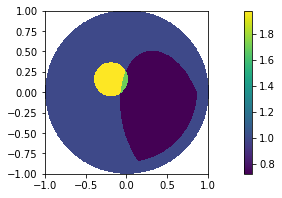

Generation of Data used for mesh independence

In [ ]:
savepath = '/content/drive/MyDrive/ColabStuff/NewDataNonCont/2ndGen/CoarserData/Mean0/NEW/Plots/MeshIndep/5'
#savepath = '/content/Data/'

num_of_samples = 10
savenum = np.min([num_of_samples, 500])
count = 1
circle_grid = 100

xi = 2* np.pi *np.cos(np.arange(circle_grid)) /circle_grid
yi = 2* np.pi* np.sin(np.arange(circle_grid)) /circle_grid

mesh_list = []
# domain = Circle(Point(0.,0.),1.0,50)   ################used for coarser data gen
# mesh = generate_mesh(domain, 10, "cgal")
# mesh_list.append(mesh)

domain = Circle(Point(0.,0.),1.0,100)   ################used for coarser data gen
mesh = generate_mesh(domain, 20, "cgal")
mesh_list.append(mesh)


# domain = Circle(Point(0.,0.),1.0,75)   ################used for coarser data gen
# mesh = generate_mesh(domain, 15, "cgal")
# mesh_list.append(mesh)

domain = Circle(Point(0.,0.),1.0,200)   ################used for coarser data gen
mesh = generate_mesh(domain, 27, "cgal")
mesh_list.append(mesh)

domain = Circle(Point(0.,0.),1.0,300)   ################used for coarser data gen
mesh = generate_mesh(domain, 30, "cgal")
mesh_list.append(mesh)

#domain = Circle(Point(0.,0.),1.0,400)   ################used for coarser data gen
#mesh = generate_mesh(domain, 50, "cgal")
#mesh_list.append(mesh)

#mesh = refine(mesh)
domain = Circle(Point(0.,0.),1.0,400)   ################used for coarser data gen
mesh = generate_mesh(domain, 50, "cgal")
mesh_list.append(mesh)

master_mesh = refine(mesh)
mesh_list.append(master_mesh)

coef_list = []
d_data = []
n_data = []
a_data_list = []
d_data_list = []
n_data_list = []

for mesh in mesh_list:
    a_data_list.append([])
    d_data_list.append([])
    n_data_list.append([])




for i in range(num_of_samples):
    mean = 0
    gridsize =2*256
    alpha = 6.0
    field = gaussian_random_field(alpha, gridsize)
    xx = np.linspace(-1.0, 1.0, num=gridsize)
    yy = np.linspace(-1.0, 1.0, num=gridsize)

    # f = scipy.interpolate.RectBivariateSpline(xx, yy, field)
    # for j in range(circle_grid):
    #     mean = mean + f(xi[j],yi[j])
    # mean = mean / circle_grid
    # print(mean)
    master_coord = master_mesh.coordinates()

    
    

    u_D = gaussian_boundary2(field, xx, yy)
    u_D = u_D - Constant(u_D([1,0]))
    

    groundvalue = 1.0

    # negCond = True
    # while negCond:
    #   shape_list = gen_shape(4)
    #   coef = circle_source_ground(1.1, [0,0], groundvalue)
    #   for shape in shape_list:
    #       coef = coef + shape
    #   if len([x for x in get_coord_values(master_coord, coef) if x < 0]) == 0:
    #       negCond = False
      
    
    def boundary(x, on_boundary):
        return on_boundary

    V = FunctionSpace(master_mesh, 'CG', 1)
    v2d = vertex_to_dof_map(V)

    bc = DirichletBC(V, u_D, boundary)


    # Define variational problem
    u = TrialFunction(V)
    v = TestFunction(V)
    f = Constant(0.0)
    a = dot(coef*grad(u), grad(v))*dx
    L = f*v*ds

    # Compute solution
    u = Function(V)
    solve(a == L, u, bc)

    nodal_values = np.array(u.vector())
    nodal_values = nodal_values[v2d]
    nodal_values = np.expand_dims(nodal_values, axis = 1)
    test = np.concatenate((master_mesh.coordinates(), nodal_values), axis = 1)
    u_values = test

    ub_interpolant = LinearNDInterpolator(u_values[:,:2], u_values[:,2])
    

    counter = 0
    for mesh in mesh_list:
        V = FunctionSpace(mesh, 'CG', 1)
        bmesh = BoundaryMesh(mesh, "exterior", True)
        Vb = FunctionSpace(bmesh, "Lagrange", 1)
        fixed_coord = bmesh.coordinates()

        bc = DirichletBC(V, u_D, boundary)

        v2d = vertex_to_dof_map(V)
        coeff_coord = mesh.coordinates()
        nodal_values = get_coord_values(coeff_coord, coef)
        test = np.concatenate((coeff_coord, nodal_values), axis = 1)
        a_data_list[counter].append(test)

        # bmesh = BoundaryMesh(mesh, "exterior", True)
        # Vb = FunctionSpace(bmesh, "Lagrange", 1)
        # ub_coord = bmesh.coordinates()

        nodal_values_b = ub_interpolant(fixed_coord[:,0], fixed_coord[:,1])
        nodal_values_b = np.expand_dims(nodal_values_b, axis = 1)
        print(numpy.isnan(nodal_values_b).any())
        test_b = np.concatenate((fixed_coord, nodal_values_b), axis = 1)
        test_b[0:3,:] = test_b[[2,0,1],:]
        d_data_list[counter].append(test_b)

        test_n = interpolate_neumann(fixed_coord,u_values, master_mesh.hmax())
        test_n[0:3] = test_n[[2,0,1]]
        n_data_list[counter].append(test_n)
        # dntest = n_data[-1]
        counter = counter + 1

    if ((i+1)%savenum == 0):
        counter = 0
        for mesh in mesh_list:
            bmesh = BoundaryMesh(mesh, "exterior", True)
            Vb = FunctionSpace(bmesh, "Lagrange", 1)
            fixed_coord = bmesh.coordinates()
            sizes = fixed_coord.shape[0]
            aname = 'adata{:03d}.mat'.format(sizes) 
            uname = 'uboundary_data{:03d}.mat'.format(sizes)
            dnname = 'dn_data{:03d}.mat'.format(sizes)
            savemat(savepath + aname,
                    {"a_data":a_data_list[counter]})
            savemat(savepath + uname,
                    {"u_data":d_data_list[counter]})
            savemat(savepath + dnname,
                    {"dn_data":n_data_list[counter]})
            counter = counter + 1
        coef_list = []
        d_data = []
        n_data = []
        count = count + 1
    if ((i+1) %100 == 0):
        print('{:04d} samples calculated'.format(i+1))

/usr/lib/python3/dist-packages/ufl/exproperators.py:325: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if arg in ("+", "-"):


False
False
True
False
False
False
False
True
False
False
False
False
True
False
False
False
False
True
False
False
False
False
True
False
False
False
False
True
False
False
False
False
True
False
False
False
False
True
False
False
False
False
True
False
False
False
False
True
False
False


# Mesh Indep DataGen


In [ ]:
class circle_source_ground(UserExpression):
    def __init__(self, radius, center, coeff, **kwargs):
        super().__init__(**kwargs)
        self._radius = radius
        self._center = center
        self._coeff = coeff
    def eval(self, value, x):
        #idxs = ((x[0,:] - self.center[0])**2 + (x[1,:] - self.center[1])**2 < self.radius**2)
        if (x[0] - self._center[0])**2 + (x[1] - self._center[1])**2 < self._radius**2:
            value[0] = self._coeff
        else:
            value[0] = 0.0
    def value_shape(self):
        return ()

In [ ]:
class circle_source(UserExpression):
    def __init__(self, radius, center, coeff, **kwargs):
        super().__init__(**kwargs)
        self._radius = radius
        self._center = center
        self._coeff = coeff
        self._eps = np.random.uniform(low = 0.85, high = 0.99)
    def eval(self, value, x):
        #idxs = ((x[0,:] - self.center[0])**2 + (x[1,:] - self.center[1])**2 < self.radius**2)
        if (x[0] - self._center[0])**2 + (x[1] - self._center[1])**2 < self._radius**2 and (x[0]**2 + x[1]**2) < self._eps**2:
            value[0] = self._coeff
        else:
            value[0] = 0.0
    def value_shape(self):
        return ()
class ellipse_source(UserExpression):
    def __init__(self, rx, ry, center, e_major, e_minor, coeff, **kwargs):
        super().__init__(**kwargs)
        rads = np.sqrt(np.diag([1/rx, 1/ry])) 
        self._coeff = coeff
        self._center = center
        E = np.concatenate((e_major,e_minor), axis = 1)
        self._W = rads @ E
        self._eps = np.random.uniform(low = 0.85, high = 0.99)
    def eval(self, value, x):
        x_cent = np.expand_dims(-np.array([(self._center[0] - x[0]), (self._center[1] - x[1])]), axis = 1)
        if np.linalg.norm(self._W @ x_cent) < 1 and (x[0]**2 + x[1]**2) < self._eps**2:
            value[0] = self._coeff
        else:
            value[0] = 0.0
    def value_shape(self):
        return ()

In [ ]:
class gaussian_boundary2(UserExpression):
    def __init__(self, field, xx, yy, **kwargs):
        super().__init__(**kwargs)
        self._f = scipy.interpolate.RectBivariateSpline(xx, yy, field)
    def eval(self, value, x):
        value[0] = self._f(x[0], x[1])[0][0]
    def value_shape(self):
        return ()

In [ ]:
#coeff_coord_bool = False
#coeff_coord_given = np.load('/content/drive/MyDrive/ColabStuff/NewDataNonCont/2ndGen/CoarserData/CoeffFinderData/coords.npy')
savepath = '/content/drive/MyDrive/ColabStuff/NewDataNonCont/2ndGen/CoarserData/Mean0/NEW/Plots/FinalNonFixed/MeshIndep/'
#savepath = '/content/Data/'

num_of_samples = 10
savenum = np.min([num_of_samples, 500])
count = 10
circle_grid = 100

xi = 2* np.pi *np.cos(np.arange(circle_grid)) /circle_grid
yi = 2* np.pi* np.sin(np.arange(circle_grid)) /circle_grid

mesh_list = []

# domain = Circle(Point(0.,0.),1.0,50)   ################used for coarser data gen
# mesh = generate_mesh(domain, 10, "cgal")
# mesh_list.append(mesh)

domain = Circle(Point(0.,0.),1.0,100)   ################used for coarser data gen
mesh = generate_mesh(domain, 20, "cgal")
mesh_list.append(mesh)


# domain = Circle(Point(0.,0.),1.0,75)   ################used for coarser data gen
# mesh = generate_mesh(domain, 15, "cgal")
# mesh_list.append(mesh)

domain = Circle(Point(0.,0.),1.0,200)   ################used for coarser data gen
mesh = generate_mesh(domain, 27, "cgal")
mesh_list.append(mesh)


#domain = Circle(Point(0.,0.),1.0,400)   ################used for coarser data gen
#mesh = generate_mesh(domain, 50, "cgal")
#mesh_list.append(mesh)

#mesh = refine(mesh)
domain = Circle(Point(0.,0.),1.0,400)   ################used for coarser data gen
mesh = generate_mesh(domain, 50, "cgal")
mesh_list.append(mesh)

master_mesh = refine(mesh)
mesh_list.append(master_mesh)

coef_list = []
d_data = []
n_data = []
a_data_list = []
d_data_list = []
n_data_list = []
for mesh in mesh_list:
    a_data_list.append([])
    d_data_list.append([])
    n_data_list.append([])

# Define boundary and coeff condition




for i in range(num_of_samples):
    mean = 0
    gridsize =2*256
    alpha = 6.0
    field = gaussian_random_field(alpha, gridsize)
    xx = np.linspace(-1.0, 1.0, num=gridsize)
    yy = np.linspace(-1.0, 1.0, num=gridsize)

    # f = scipy.interpolate.RectBivariateSpline(xx, yy, field)
    # for j in range(circle_grid):
    #     mean = mean + f(xi[j],yi[j])
    # mean = mean / circle_grid
    # print(mean)
    master_coord = master_mesh.coordinates()

    
    

    u_D = gaussian_boundary2(field, xx, yy)
    u_D = u_D - Constant(u_D([1,0]))
    

    groundvalue = 1.0

    negCond = True
    while negCond:
      shape_list = gen_shape(4)
      coef = circle_source_ground(1.1, [0,0], groundvalue)
      for shape in shape_list:
          coef = coef + shape
      if len([x for x in get_coord_values(master_coord, coef) if x < 0]) == 0:
          negCond = False
      
    
    def boundary(x, on_boundary):
        return on_boundary

    V = FunctionSpace(master_mesh, 'CG', 1)
    v2d = vertex_to_dof_map(V)

    bc = DirichletBC(V, u_D, boundary)


    # Define variational problem
    u = TrialFunction(V)
    v = TestFunction(V)
    f = Constant(0.0)
    a = dot(coef*grad(u), grad(v))*dx
    L = f*v*ds

    # Compute solution
    u = Function(V)
    solve(a == L, u, bc)

    nodal_values = np.array(u.vector())
    nodal_values = nodal_values[v2d]
    nodal_values = np.expand_dims(nodal_values, axis = 1)
    test = np.concatenate((master_mesh.coordinates(), nodal_values), axis = 1)
    u_values = test

    ub_interpolant = LinearNDInterpolator(u_values[:,:2], u_values[:,2])
    
    counter = 0

    for mesh in mesh_list:
        V = FunctionSpace(mesh, 'CG', 1)
        bmesh = BoundaryMesh(mesh, "exterior", True)
        Vb = FunctionSpace(bmesh, "Lagrange", 1)
        fixed_coord = bmesh.coordinates()

        bc = DirichletBC(V, u_D, boundary)

        v2d = vertex_to_dof_map(V)
        coeff_coord = mesh.coordinates()
        nodal_values = get_coord_values(coeff_coord, coef)
        test = np.concatenate((coeff_coord, nodal_values), axis = 1)
        a_data_list[counter].append(test)

        # bmesh = BoundaryMesh(mesh, "exterior", True)
        # Vb = FunctionSpace(bmesh, "Lagrange", 1)
        # ub_coord = bmesh.coordinates()

        nodal_values_b = ub_interpolant(fixed_coord[:,0], fixed_coord[:,1])
        nodal_values_b = np.expand_dims(nodal_values_b, axis = 1)
        test_b = np.concatenate((fixed_coord, nodal_values_b), axis = 1)
        test_b[0:3,:] = test_b[[2,0,1],:]
        d_data_list[counter].append(test_b)

        test_n = interpolate_neumann(fixed_coord,u_values, master_mesh.hmax())
        test_n[0:3] = test_n[[2,0,1]]
        n_data_list[counter].append(test_n)
        counter = counter + 1

    if ((i+1)%savenum == 0):
        counter = 0
        for mesh in mesh_list:
            bmesh = BoundaryMesh(mesh, "exterior", True)
            Vb = FunctionSpace(bmesh, "Lagrange", 1)
            fixed_coord = bmesh.coordinates()
            sizes = fixed_coord.shape[0]
            aname = 'adata{:03d}.mat'.format(sizes) 
            uname = 'uboundary_data{:03d}.mat'.format(sizes)
            dnname = 'dn_data{:03d}.mat'.format(sizes)
            savemat(savepath + aname,
                    {"a_data":a_data_list[counter]})
            savemat(savepath + uname,
                    {"u_data":d_data_list[counter]})
            savemat(savepath + dnname,
                    {"dn_data":n_data_list[counter]})
            counter = counter + 1
        coef_list = []
        d_data = []
        n_data = []
        count = count + 1
    if ((i+1) %100 == 0):
        print('{:04d} samples calculated'.format(i+1))
        

/usr/lib/python3/dist-packages/ufl/exproperators.py:325: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if arg in ("+", "-"):


# Helmholtz Datagen

In [ ]:
#coeff_coord_bool = False
#coeff_coord_given = np.load('/content/drive/MyDrive/ColabStuff/NewDataNonCont/2ndGen/CoarserData/CoeffFinderData/coords.npy')
savepath = '/content/drive/MyDrive/ColabStuff/Helmholtz/'
#savepath = '/content/Data/'

num_of_samples = 7000
savenum = np.min([num_of_samples, 500])
count = 1
circle_grid = 100

xi = 2* np.pi *np.cos(np.arange(circle_grid)) /circle_grid
yi = 2* np.pi* np.sin(np.arange(circle_grid)) /circle_grid

mesh_list = []

domain = Circle(Point(0.,0.),1.0,200)   
mesh = generate_mesh(domain, 27, "cgal")

# domain = Circle(Point(0.,0.),1.0,100)   ################used for coarser data gen
# mesh = generate_mesh(domain, 20, "cgal")
mesh_list.append(mesh)
bmesh = BoundaryMesh(mesh, "exterior", True)
Vb = FunctionSpace(bmesh, "Lagrange", 1)
fixed_coord = bmesh.coordinates()



domain = Circle(Point(0.,0.),1.0,400)   ################used for coarser data gen
mesh = generate_mesh(domain, 50, "cgal")


#domain = Circle(Point(0.,0.),1.0,400)   ################used for coarser data gen
#mesh = generate_mesh(domain, 50, "cgal")
#mesh_list.append(mesh)

#mesh = refine(mesh)
master_mesh = mesh

coef_list = []
d_data = []
n_data = []

omega = 2 * np.pi



# Define boundary and coeff condition




for i in range(num_of_samples):
    mean = 0
    gridsize =2*256
    alpha = 6.0
    field = gaussian_random_field(alpha, gridsize)
    kfield = gaussian_random_field(alpha, gridsize)
    kfield = (kfield - np.min(kfield) )/ np.max(kfield - np.min(kfield))
    kfield = 2*kfield + 0.5 
    
    xx = np.linspace(-1.0, 1.0, num=gridsize)
    yy = np.linspace(-1.0, 1.0, num=gridsize)

    # f = scipy.interpolate.RectBivariateSpline(xx, yy, field)
    # for j in range(circle_grid):
    #     mean = mean + f(xi[j],yi[j])
    # mean = mean / circle_grid
    # print(mean)
    master_coord = master_mesh.coordinates()

    
    
    n = gaussian_boundary2(kfield, xx, yy)
    u_D = gaussian_boundary2(field, xx, yy)
    u_D = u_D - Constant(u_D([1,0]))
    
      
    
    def boundary(x, on_boundary):
        return on_boundary

    V = FunctionSpace(master_mesh, "Lagrange", 1)
    v2d = vertex_to_dof_map(V)

    bc = DirichletBC(V, u_D, boundary)
    k = Constant(10.0)

    # Define variational problem
    u = TrialFunction(V)
    v = TestFunction(V)
    f = Constant(0.0)
    a = ((k**2 / n**2) * inner(u, v) - inner(nabla_grad(u), nabla_grad(v))) * dx
    L = f*v*dx

    # Compute solution
    u = Function(V)
    solve(a == L, u, bc)

    nodal_values = np.array(u.vector())
    nodal_values = nodal_values[v2d]
    nodal_values = np.expand_dims(nodal_values, axis = 1)
    test = np.concatenate((master_mesh.coordinates(), nodal_values), axis = 1)
    u_values = test

    ub_interpolant = LinearNDInterpolator(u_values[:,:2], u_values[:,2])
    


    for mesh in mesh_list:
        V = FunctionSpace(mesh, "Lagrange", 1)

        bc = DirichletBC(V, u_D, boundary)

        v2d = vertex_to_dof_map(V)
        coeff_coord = mesh.coordinates()
        nodal_values = get_coord_values(coeff_coord, n)
        test = np.concatenate((coeff_coord, nodal_values), axis = 1)
        coef_list.append(test)

        # bmesh = BoundaryMesh(mesh, "exterior", True)
        # Vb = FunctionSpace(bmesh, "Lagrange", 1)
        # ub_coord = bmesh.coordinates()

        nodal_values_b = ub_interpolant(fixed_coord[:,0], fixed_coord[:,1])
        nodal_values_b = np.expand_dims(nodal_values_b, axis = 1)
        test_b = np.concatenate((fixed_coord, nodal_values_b), axis = 1)
        test_b[0:3,:] = test_b[[2,0,1],:]
        d_data.append(test_b)

        test_n = interpolate_neumann(fixed_coord,u_values, master_mesh.hmax())
        test_n[0:3] = test_n[[2,0,1]]
        n_data.append(test_n)
        dntest = n_data[-1]

    if ((i+1)%savenum == 0):
        aname = 'adata{:02d}.mat'.format(count) 
        uname = 'uboundary_data{:02d}.mat'.format(count)
        dnname = 'dn_data{:02d}.mat'.format(count)
        savemat(savepath + aname,
                {"a_data":coef_list})
        savemat(savepath + uname,
                {"u_data":d_data})
        savemat(savepath + dnname,
                {"dn_data":n_data})
        coef_list = []
        d_data = []
        n_data = []
        count = count + 1
    if ((i+1) %100 == 0):
        print('{:04d} samples calculated'.format(i+1))
        


coef_FEM = project(n, V)
u_D1 = project(u_D, V)

# Plot solution and mesh
fig = plt.figure()
plot(u, title = 'solution')
plt.show()
fig = plt.figure()
plot(coef_FEM, title = 'wavespeed')
plt.show()

#fig = plt.figure()
#ax = plt.axes(projection='3d')
#ax.view_init(azim=-90, elev=90)
#ax.plot_trisurf(coef_list[-1][:,0], coef_list[-1][:,1], coef_list[-1][:,2], cmap='viridis', linewidth=0.2, antialiased=True, edgecolor='grey')
#plt.show()

fig = plt.figure()
ax = fig.add_subplot(1,2,1, projection='3d')

ax = plt.axes(projection='3d')
ax.set_xticks([-1,0,1])
ax.set_yticks([-1,0,1])
ax.set_zticks([-4,-3,-2,-1,0,1,2,3,4])
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

# Now set color to white (or whatever is "invisible")
ax.xaxis.pane.set_edgecolor('w')
ax.yaxis.pane.set_edgecolor('w')
ax.zaxis.pane.set_edgecolor('w')
ax.grid(False)
ax.plot(test_b[:,0], test_b[:,1], test_b[:,2], label='Ground truth', color='black', linewidth = 2 )


test_b[:,2] = dntest

ax = fig.add_subplot(1,2,2, projection='3d')
ax = plt.axes(projection='3d')
ax.set_xticks([-1,0,1])
ax.set_yticks([-1,0,1])
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

# Now set color to white (or whatever is "invisible")
ax.xaxis.pane.set_edgecolor('w')
ax.yaxis.pane.set_edgecolor('w')
ax.zaxis.pane.set_edgecolor('w')
ax.grid(False)
ax.plot(test_b[:,0], test_b[:,1], test_b[:,2], label='Ground truth', color='black', linewidth = 2 )
#ax.scatter(test_b[0:3,0], test_b[0:3,1], test_b[0:3,2])
plt.show()


(512, 512)


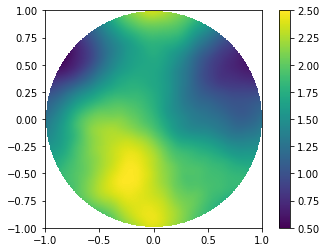

0100 samples calculated
0200 samples calculated
0300 samples calculated
0400 samples calculated
0500 samples calculated
0600 samples calculated
0700 samples calculated
0800 samples calculated
0900 samples calculated
1000 samples calculated
1100 samples calculated
1200 samples calculated
1300 samples calculated
1400 samples calculated
1500 samples calculated
1600 samples calculated
1700 samples calculated
1800 samples calculated
1900 samples calculated
2000 samples calculated


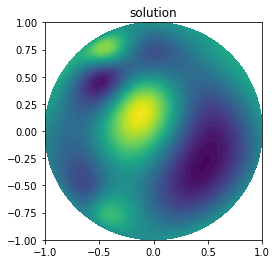

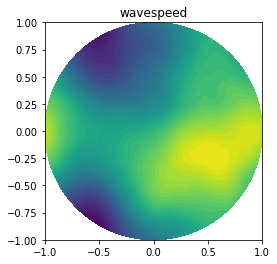

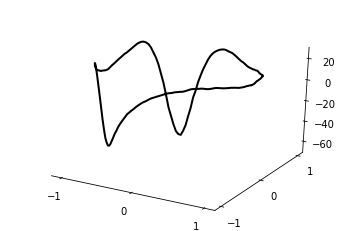

In [ ]:
#coeff_coord_bool = False
#coeff_coord_given = np.load('/content/drive/MyDrive/ColabStuff/NewDataNonCont/2ndGen/CoarserData/CoeffFinderData/coords.npy')
savepath = '/content/drive/MyDrive/ColabStuff/Helmholtz/Fixed'
#savepath = '/content/Data/'

num_of_samples = 2000
savenum = np.min([num_of_samples, 500])
count = 2
circle_grid = 100

xi = 2* np.pi *np.cos(np.arange(circle_grid)) /circle_grid
yi = 2* np.pi* np.sin(np.arange(circle_grid)) /circle_grid

mesh_list = []

domain = Circle(Point(0.,0.),1.0,200)   
mesh = generate_mesh(domain, 27, "cgal")

# domain = Circle(Point(0.,0.),1.0,100)   ################used for coarser data gen
# mesh = generate_mesh(domain, 20, "cgal")
mesh_list.append(mesh)
bmesh = BoundaryMesh(mesh, "exterior", True)
Vb = FunctionSpace(bmesh, "Lagrange", 1)
fixed_coord = bmesh.coordinates()



domain = Circle(Point(0.,0.),1.0,400)   ################used for coarser data gen
mesh = generate_mesh(domain, 50, "cgal")


gridsize =2*256
alpha = 6.0
xx = np.linspace(-1.0, 1.0, num=gridsize)
yy = np.linspace(-1.0, 1.0, num=gridsize)
X,Y = np.meshgrid(xx,yy)
rad = np.sqrt((X - 0)**2 + (Y-0)**2)
mask = rad <= 1
print(mask.shape)


#mesh = refine(mesh)
master_mesh = mesh

coef_list = []
d_data = []
n_data = []

omega = 2 * np.pi



# Define boundary and coeff condition
kfield = gaussian_random_field(alpha, gridsize)
kfield = (kfield - np.min(kfield) )/ np.max(kfield - np.min(kfield))
kfield = 2*kfield + 0.5 
fig = plt.figure()
znull = np.ma.masked_where(~mask, kfield)
im = plt.imshow(znull,extent=[-1, 1, -1, 1], vmin =0.5, vmax = 2.5)
axs = plt.gca()
fig.colorbar(im, ax=axs)
plt.savefig('Data/FixedCoeff.eps', format='eps')
plt.savefig('Data/FixedCoeff.png')
plt.show()


n = gaussian_boundary2(kfield, xx, yy)


for i in range(num_of_samples):
    mean = 0
    gridsize =2*256
    alpha = 6.0
    field = gaussian_random_field(alpha, gridsize)

    
    xx = np.linspace(-1.0, 1.0, num=gridsize)
    yy = np.linspace(-1.0, 1.0, num=gridsize)

    # f = scipy.interpolate.RectBivariateSpline(xx, yy, field)
    # for j in range(circle_grid):
    #     mean = mean + f(xi[j],yi[j])
    # mean = mean / circle_grid
    # print(mean)
    master_coord = master_mesh.coordinates()

    
    

    u_D = gaussian_boundary2(field, xx, yy)
    u_D = u_D - Constant(u_D([1,0]))
    
      
    
    def boundary(x, on_boundary):
        return on_boundary

    V = FunctionSpace(master_mesh, "Lagrange", 1)
    v2d = vertex_to_dof_map(V)

    bc = DirichletBC(V, u_D, boundary)
    k = Constant(10.0)

    # Define variational problem
    u = TrialFunction(V)
    v = TestFunction(V)
    f = Constant(0.0)
    a = ((k**2 / n**2) * inner(u, v) - inner(nabla_grad(u), nabla_grad(v))) * dx
    L = f*v*dx

    # Compute solution
    u = Function(V)
    solve(a == L, u, bc)

    nodal_values = np.array(u.vector())
    nodal_values = nodal_values[v2d]
    nodal_values = np.expand_dims(nodal_values, axis = 1)
    test = np.concatenate((master_mesh.coordinates(), nodal_values), axis = 1)
    u_values = test

    ub_interpolant = LinearNDInterpolator(u_values[:,:2], u_values[:,2])
    


    for mesh in mesh_list:
        V = FunctionSpace(mesh, "Lagrange", 1)

        bc = DirichletBC(V, u_D, boundary)

        v2d = vertex_to_dof_map(V)
        coeff_coord = mesh.coordinates()
        nodal_values = get_coord_values(coeff_coord, n)
        test = np.concatenate((coeff_coord, nodal_values), axis = 1)
        coef_list.append(test)

        # bmesh = BoundaryMesh(mesh, "exterior", True)
        # Vb = FunctionSpace(bmesh, "Lagrange", 1)
        # ub_coord = bmesh.coordinates()

        nodal_values_b = ub_interpolant(fixed_coord[:,0], fixed_coord[:,1])
        nodal_values_b = np.expand_dims(nodal_values_b, axis = 1)
        test_b = np.concatenate((fixed_coord, nodal_values_b), axis = 1)
        test_b[0:3,:] = test_b[[2,0,1],:]
        d_data.append(test_b)

        test_n = interpolate_neumann(fixed_coord,u_values, master_mesh.hmax())
        test_n[0:3] = test_n[[2,0,1]]
        n_data.append(test_n)
        dntest = n_data[-1]

    if ((i+1)%savenum == 0):
        aname = 'adata{:02d}.mat'.format(count) 
        uname = 'uboundary_data{:02d}.mat'.format(count)
        dnname = 'dn_data{:02d}.mat'.format(count)
        savemat(savepath + aname,
                {"a_data":coef_list})
        savemat(savepath + uname,
                {"u_data":d_data})
        savemat(savepath + dnname,
                {"dn_data":n_data})
        coef_list = []
        d_data = []
        n_data = []
        count = count + 1
    if ((i+1) %100 == 0):
        print('{:04d} samples calculated'.format(i+1))
        


coef_FEM = project(n, V)
u_D1 = project(u_D, V)

# Plot solution and mesh
fig = plt.figure()
plot(u, title = 'solution')
plt.show()
fig = plt.figure()
plot(coef_FEM, title = 'wavespeed')
plt.show()

#fig = plt.figure()
#ax = plt.axes(projection='3d')
#ax.view_init(azim=-90, elev=90)
#ax.plot_trisurf(coef_list[-1][:,0], coef_list[-1][:,1], coef_list[-1][:,2], cmap='viridis', linewidth=0.2, antialiased=True, edgecolor='grey')
#plt.show()

fig = plt.figure()
ax = fig.add_subplot(1,2,1, projection='3d')

ax = plt.axes(projection='3d')
ax.set_xticks([-1,0,1])
ax.set_yticks([-1,0,1])
ax.set_zticks([-4,-3,-2,-1,0,1,2,3,4])
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

# Now set color to white (or whatever is "invisible")
ax.xaxis.pane.set_edgecolor('w')
ax.yaxis.pane.set_edgecolor('w')
ax.zaxis.pane.set_edgecolor('w')
ax.grid(False)
ax.plot(test_b[:,0], test_b[:,1], test_b[:,2], label='Ground truth', color='black', linewidth = 2 )


test_b[:,2] = dntest

ax = fig.add_subplot(1,2,2, projection='3d')
ax = plt.axes(projection='3d')
ax.set_xticks([-1,0,1])
ax.set_yticks([-1,0,1])
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

# Now set color to white (or whatever is "invisible")
ax.xaxis.pane.set_edgecolor('w')
ax.yaxis.pane.set_edgecolor('w')
ax.zaxis.pane.set_edgecolor('w')
ax.grid(False)
ax.plot(test_b[:,0], test_b[:,1], test_b[:,2], label='Ground truth', color='black', linewidth = 2 )
#ax.scatter(test_b[0:3,0], test_b[0:3,1], test_b[0:3,2])
plt.show()